In [23]:
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import hist
import os
import sys
import re
import pandas as pd
sys.path.append("/uscms/home/lkong/nobackup/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools")
import plotTools as ptools
import mplhep

# Cutflow plots

In [24]:
str = "_ID-all"

In [25]:
f_sig = str+"/skimmed_signal_v2_2018_aEM"+str+".coffea"
sig = util.load(f_sig)[0]

bkg_files = {
    "QCD":str+"/skimmed_bkg_2018_QCD_TuneCP5_PSWeights"+str+".coffea",
    "Top":str+"/skimmed_bkg_2018_Top"+str+".coffea",
    "DY":str+"/skimmed_bkg_2018_DY"+str+".coffea",
    "Diboson":str+"/skimmed_bkg_2018_Diboson"+str+".coffea",
    "Triboson":str+"/skimmed_bkg_2018_Triboson"+str+".coffea",
    "W+jets":str+"/skimmed_bkg_2018_WJets"+str+".coffea",
    "Z+jets":str+"/skimmed_bkg_2018_ZJets"+str+".coffea"
}
bkg_histos = {}
histograms = []
for b in bkg_files.keys():
    bkg_histos[b] = util.load(bkg_files[b])[0]
    histograms = list(bkg_histos[b].keys())
bkg = {}
for h in histograms:
    if type(bkg_histos['QCD'][h]) != hist.Hist:
        bkg[h] = {b:bkg_histos[b][h] for b in bkg_histos.keys()}

In [26]:
cutflows = ['cutDesc', 'cutflow', 'cutflow_cts']
histos = [k for k in sig.keys() if k not in cutflows]
sig_samples = list(sig['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples},orient='index')
cuts = list(sig['cutflow'][sig_samples[0]].keys())
cutNames = {cname:ptools.getCut(sig['cutDesc'][cname]) for cname in sig['cutDesc'].keys()}
deltas = sorted(list(set(si.delta)))
ctaus = sorted(list(set(si.ctau)))

In [19]:
cutNames

{'all': 'No cuts',
 'hasVtx': 'Baseline Selection',
 'cut5': 'No b-tagged jets',
 'cut6': 'Leading jet |eta| < 2.4',
 'cut7': 'Leading jet pT > 80 GeV',
 'cut8': 'dPhi(MET,leading jet) > 1.5',
 'cut9': 'dPhi(MET,all jets) > 0.75',
 'cut10': 'OSSF',
 'cut11': 'Vertex chi2/df < 3',
 'cut12': 'dPhi(MET,vtx) < 1',
 'cut13': 'm(ee) < 20',
 'cut14': 'dR(ee) < 1.0',
 'cut15': 'minDxy > 0.01'}

# Signal

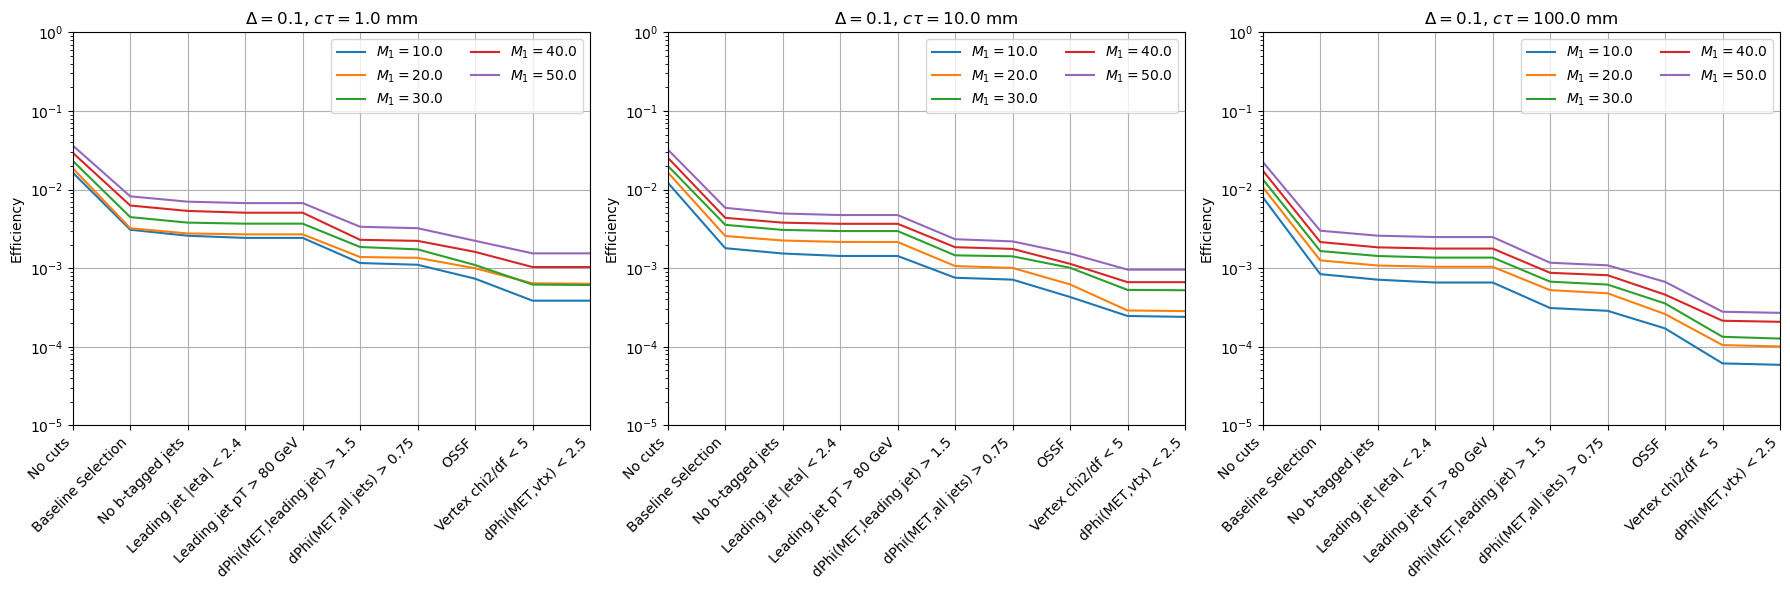

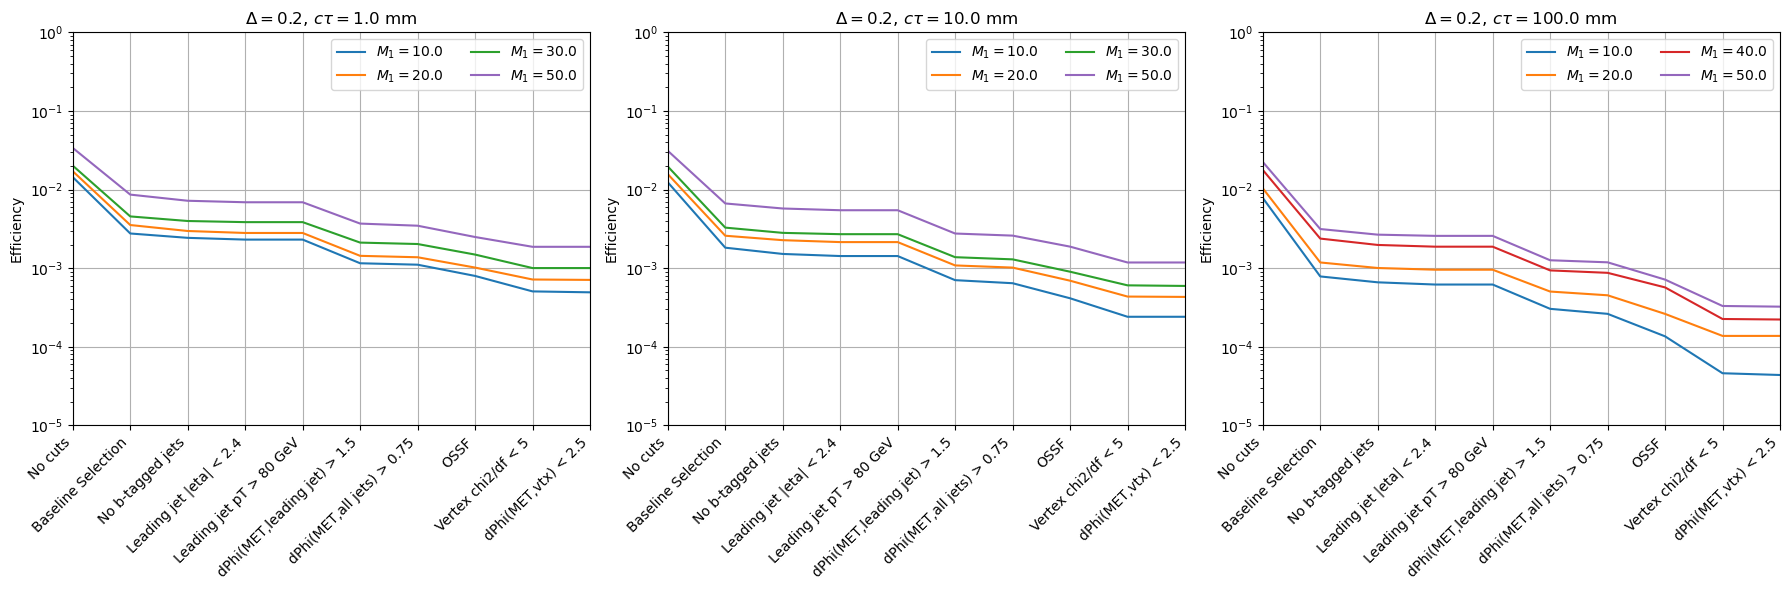

In [6]:
# signal efficiencies by delta/ctau
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    #plt.figure(figsize=(12,12))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        plt.sca(axes[i])
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs = [cf_s[pt][cut] for cut in cuts]
            plt.plot(np.arange(len(cuts)),effs,label=r"$M_1 = {0}$".format(m1),color=f"C{all_m1s.index(m1)}")
        plt.legend(loc='upper right',ncol=2)
        plt.ylim([0.00001,1])
        plt.xlim([0,len(cuts)-1])
        plt.yscale('log')
        plt.ylabel("Efficiency")
        plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
        plt.grid()
    plt.tight_layout()
    #plt.savefig(f"plots/cutflows/signal_effs_delta{delta:.1f}.pdf")
    #plt.close()

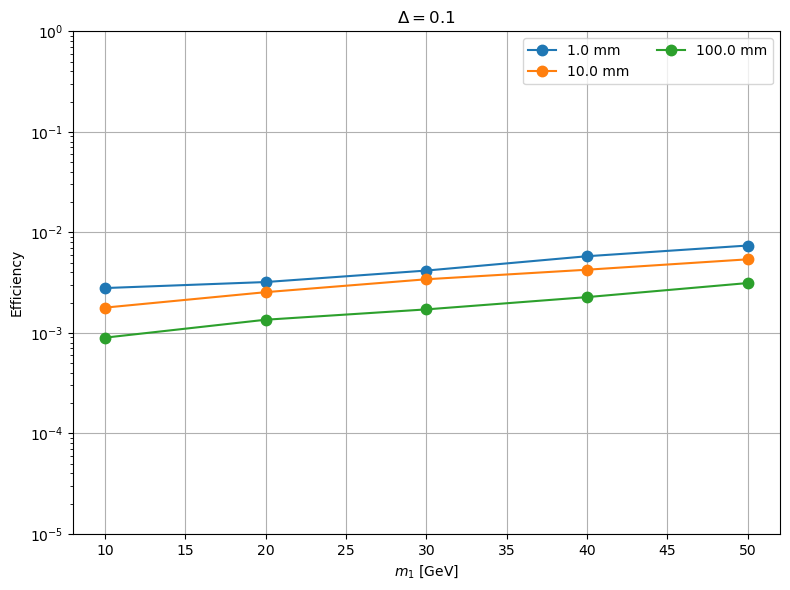

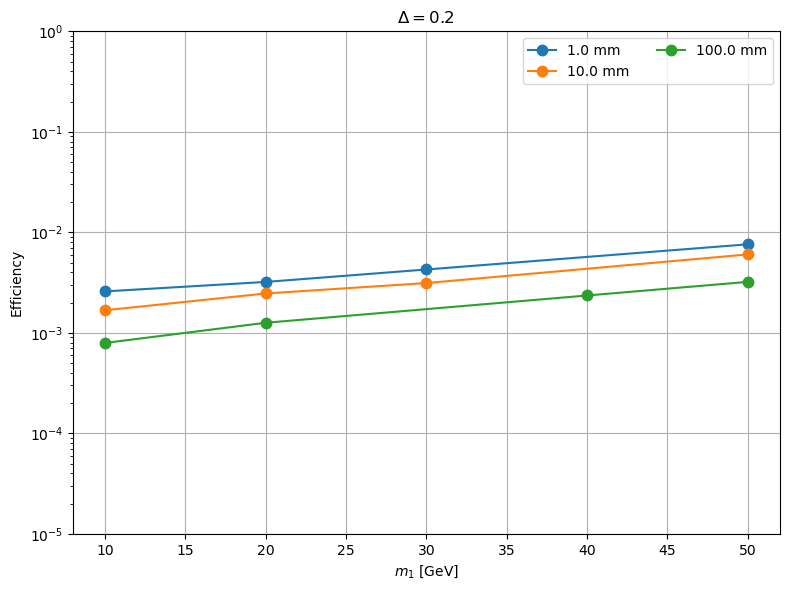

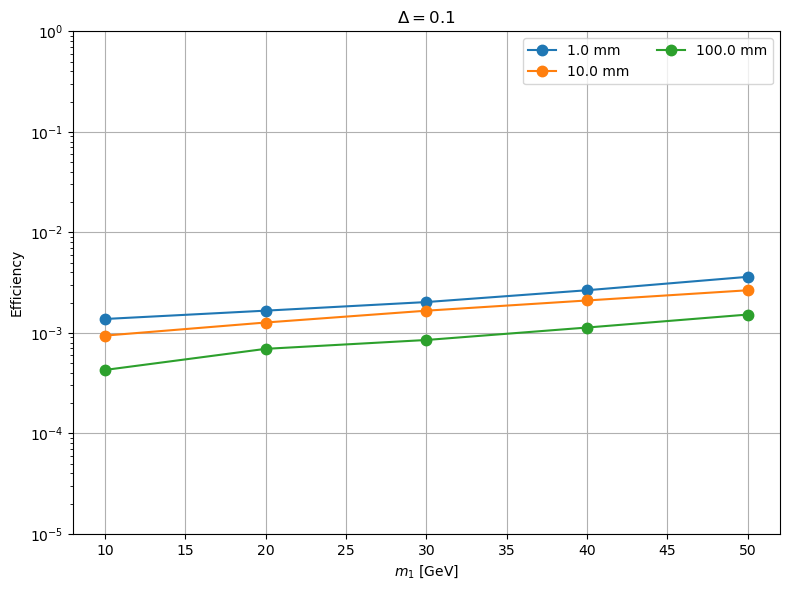

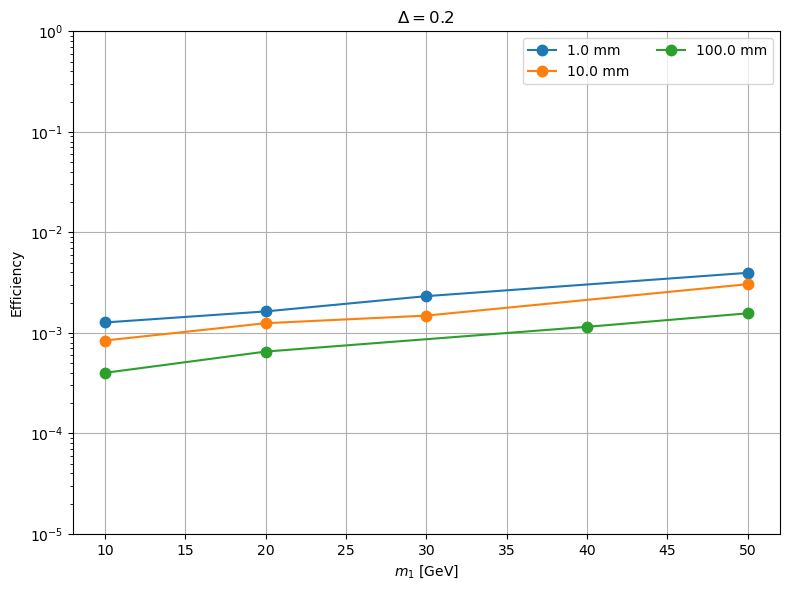

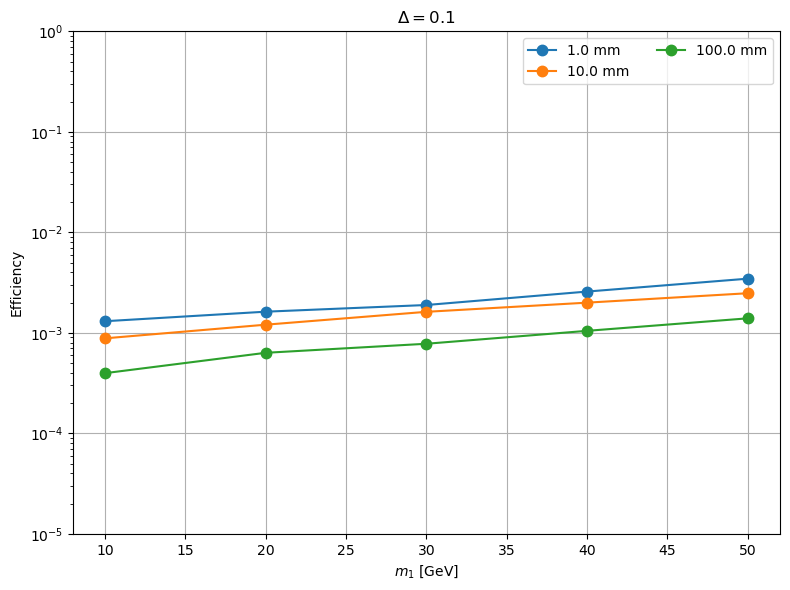

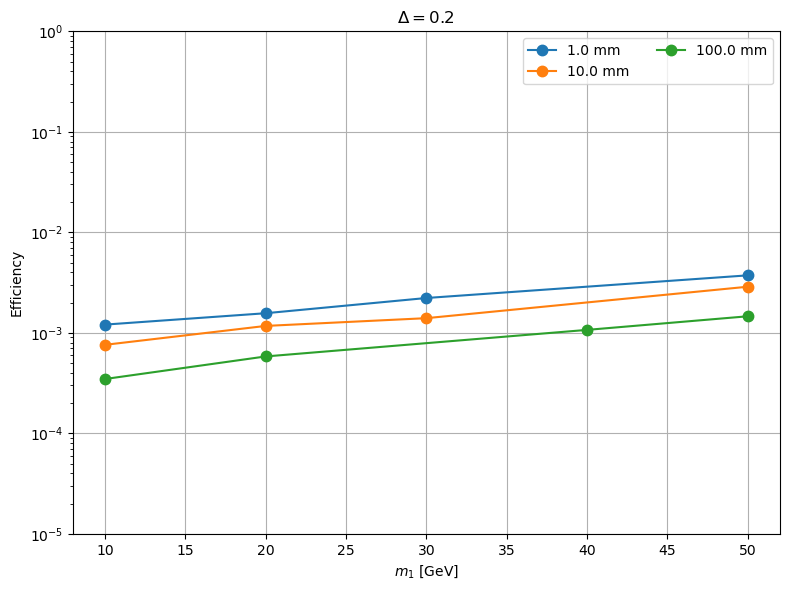

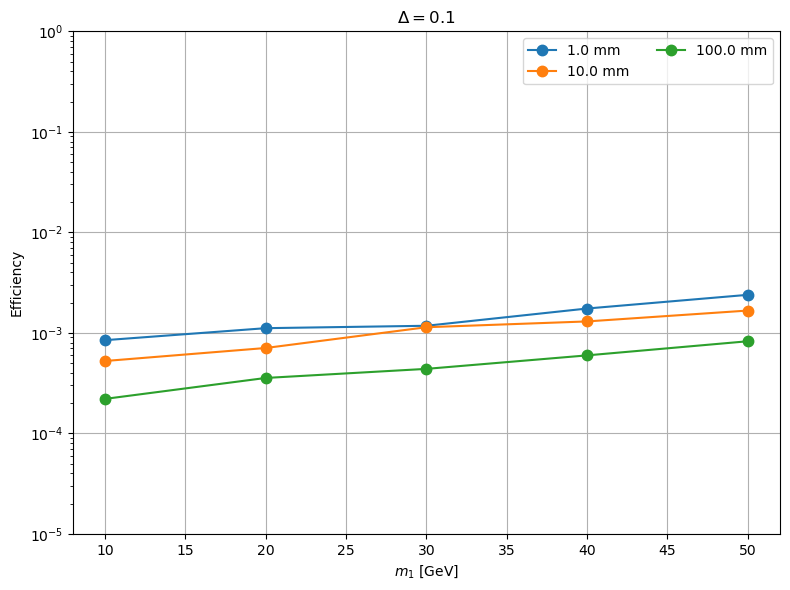

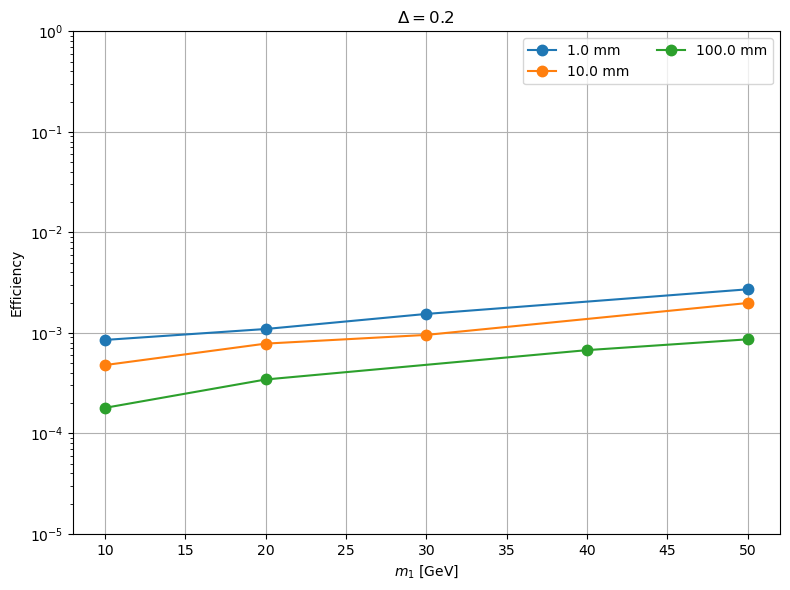

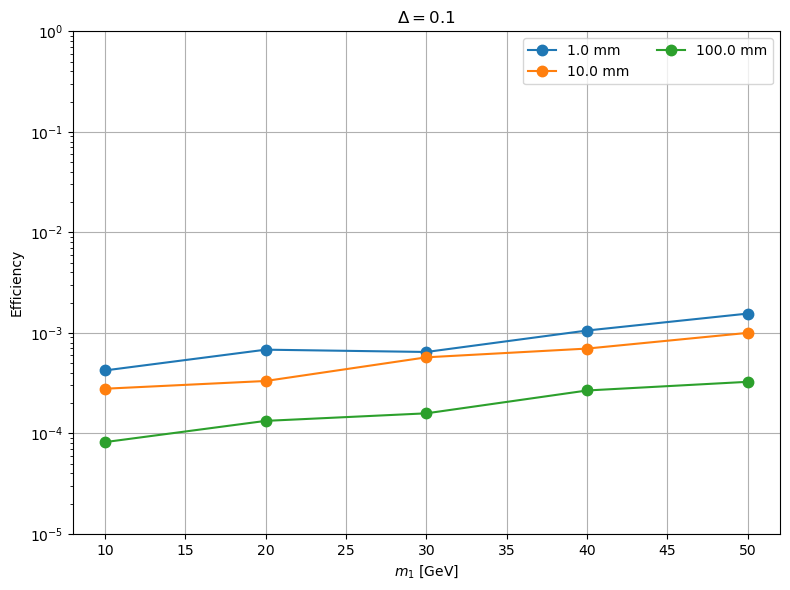

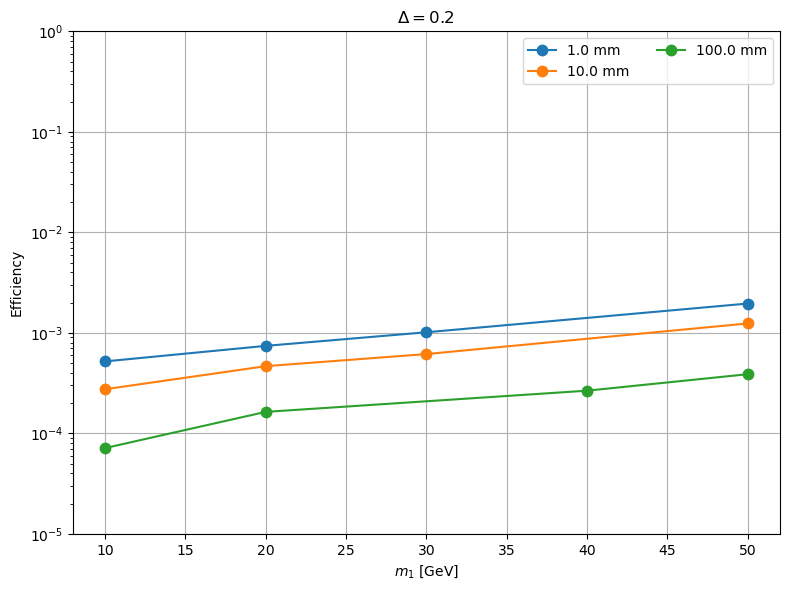

In [7]:
# signal efficiencies by m1 (ctau overlay) on second to last cut
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for cut in ['cut7','cut8','cut9','cut10','cut11']:
    for delta in deltas:
        all_m1s = sorted(list(set(si[si.delta==delta].m1)))
        plt.figure(figsize=(8,6))
        ctaus = sorted(list(set(si[si.delta==delta].ctau)))
        plt.title(r"$\Delta = {0:.1f}$".format(delta))
        for i,ct in enumerate(ctaus):
            m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
            effs = []
            for m1 in m1s:
                pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
                effs.append(cf_s[pt][cut])
            plt.plot(m1s,effs,label=f"{ct} mm",marker='.',markersize=15)
        plt.legend(loc='upper right',ncol=2)
        plt.ylim([0.00001,1])
        plt.yscale('log')
        plt.ylabel("Efficiency")
        plt.xlabel("$m_1$ [GeV]")
        plt.grid()
        plt.tight_layout()
        #plt.savefig(f"plots/cutflows/signal_{cut}_effs_delta{delta:.1f}.pdf")
        #plt.close()

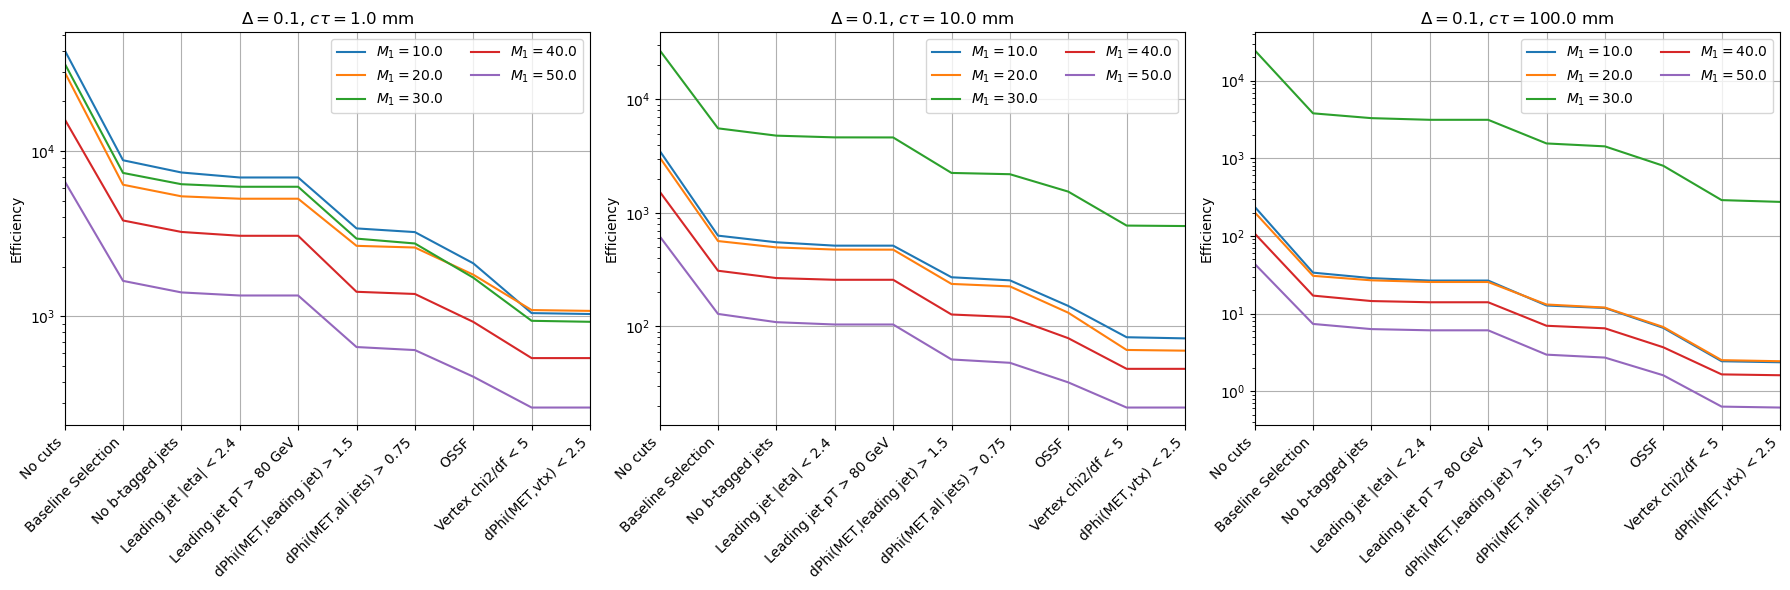

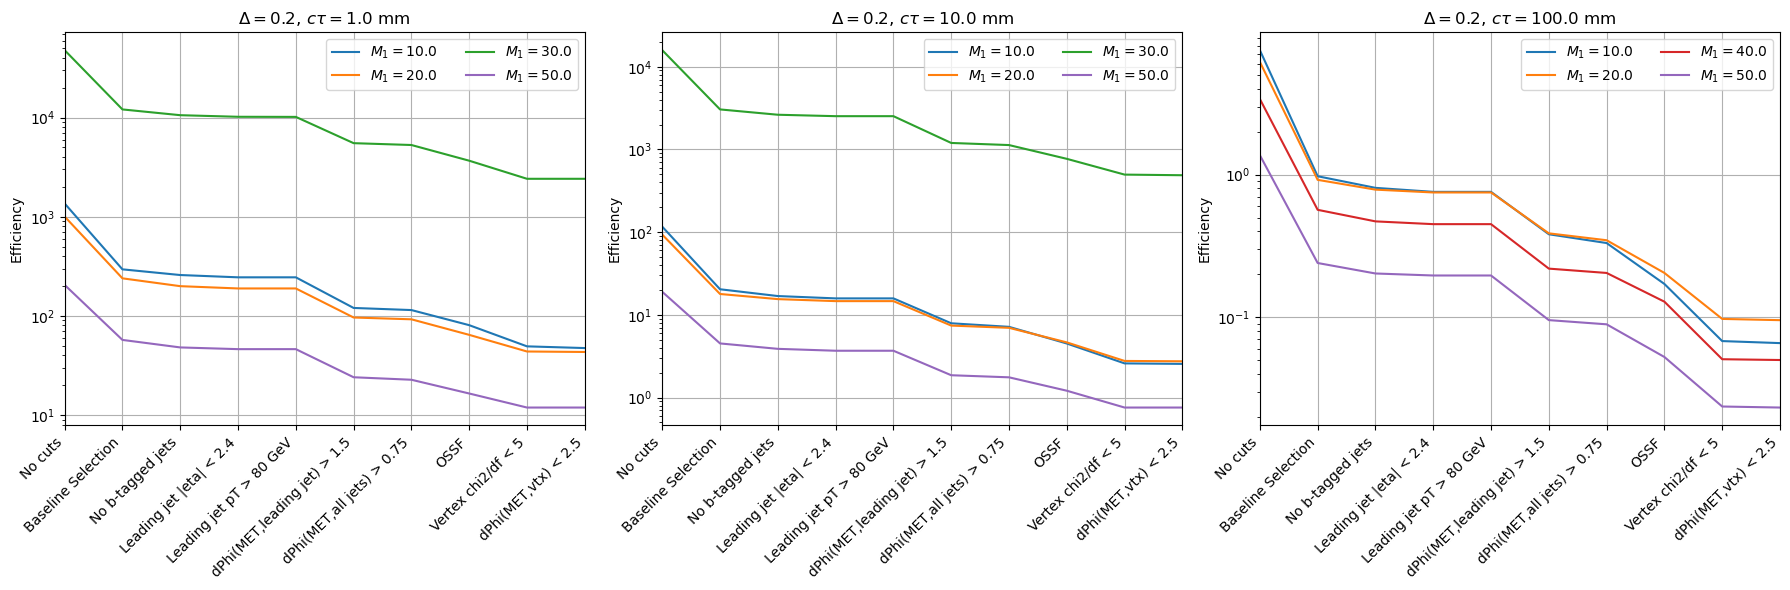

In [8]:
# signal counts by delta/ctau
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    #plt.figure(figsize=(12,12))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        plt.sca(axes[i])
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs = [ct_s[pt][cut] for cut in cuts]
            plt.plot(np.arange(len(cuts)),effs,label=r"$M_1 = {0}$".format(m1),color=f"C{all_m1s.index(m1)}")
        plt.legend(loc='upper right',ncol=2)
        #plt.ylim([0.00001,1])
        plt.xlim([0,len(cuts)-1])
        plt.yscale('log')
        plt.ylabel("Efficiency")
        plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
        plt.grid()
    plt.tight_layout()
    #plt.savefig(f"plots/cutflows/signal_counts_delta{delta:.1f}.pdf")
    #plt.close()

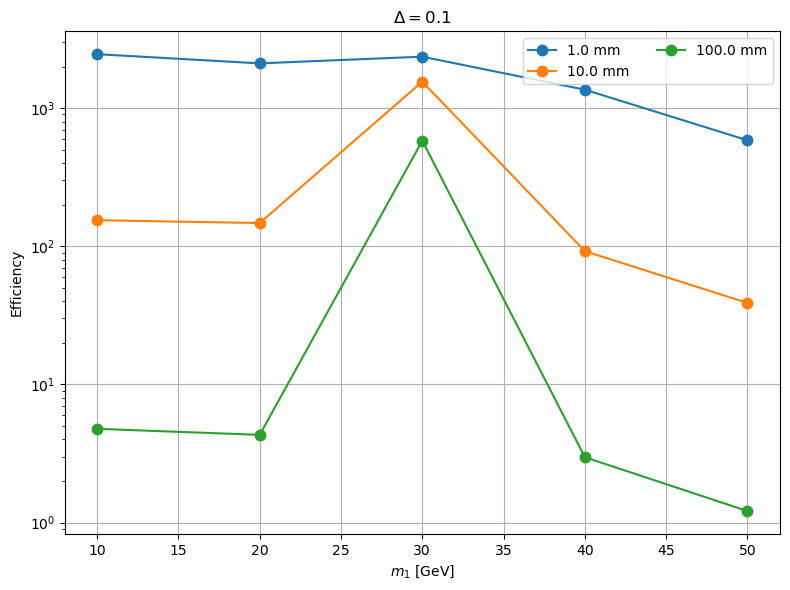

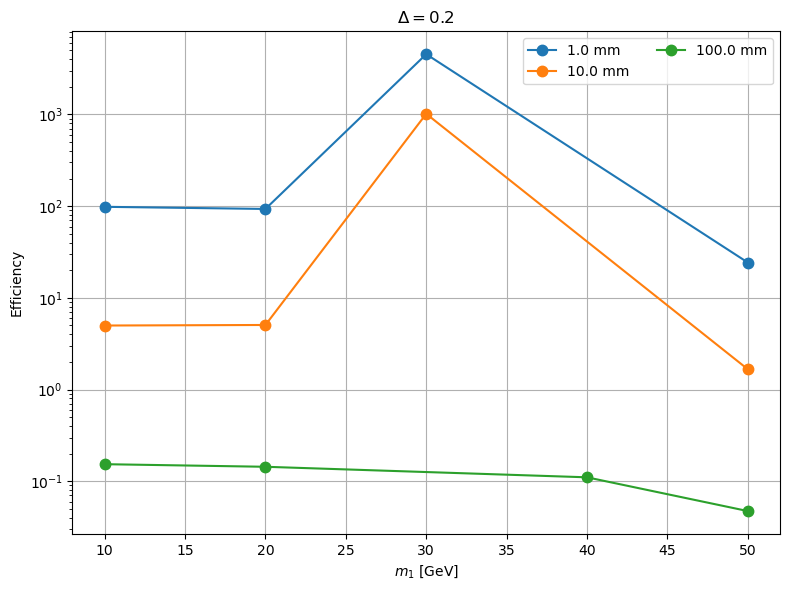

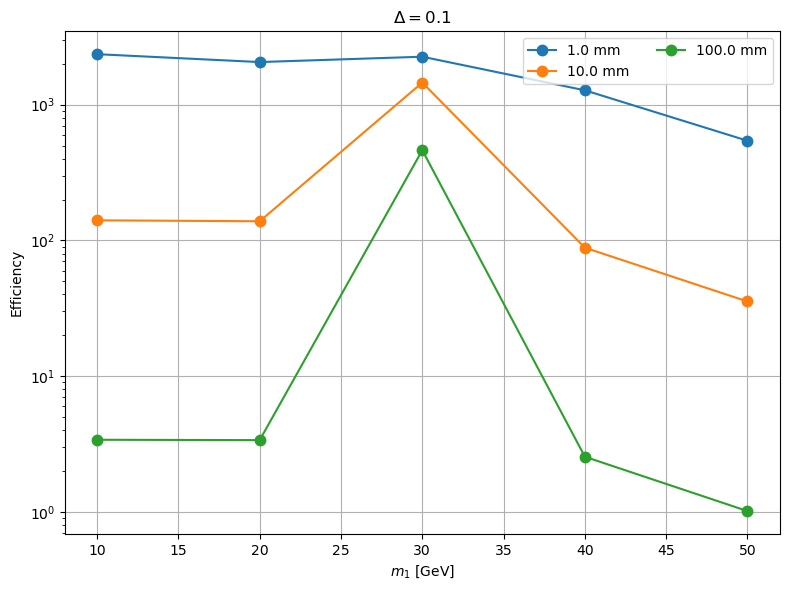

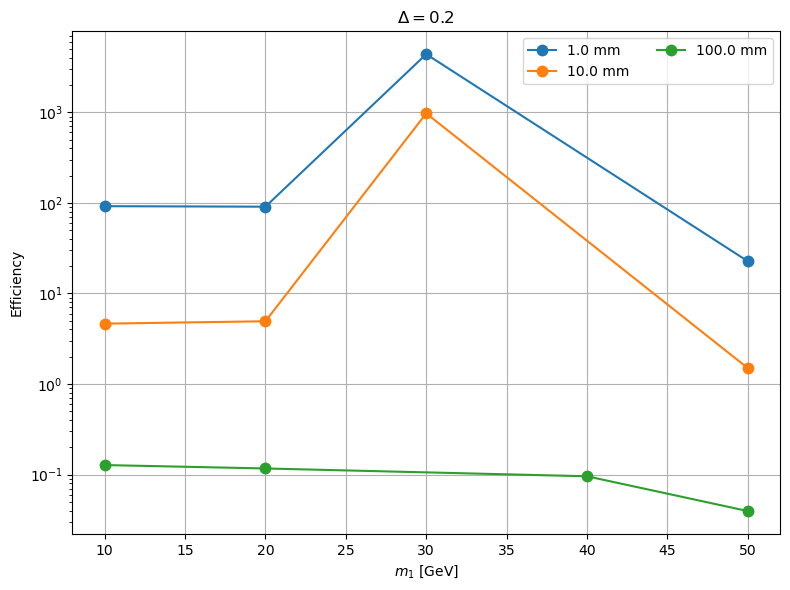

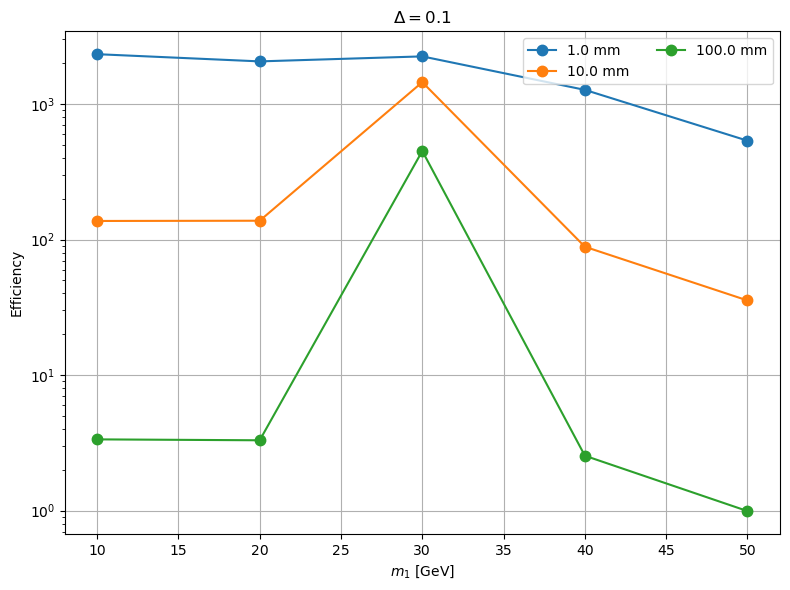

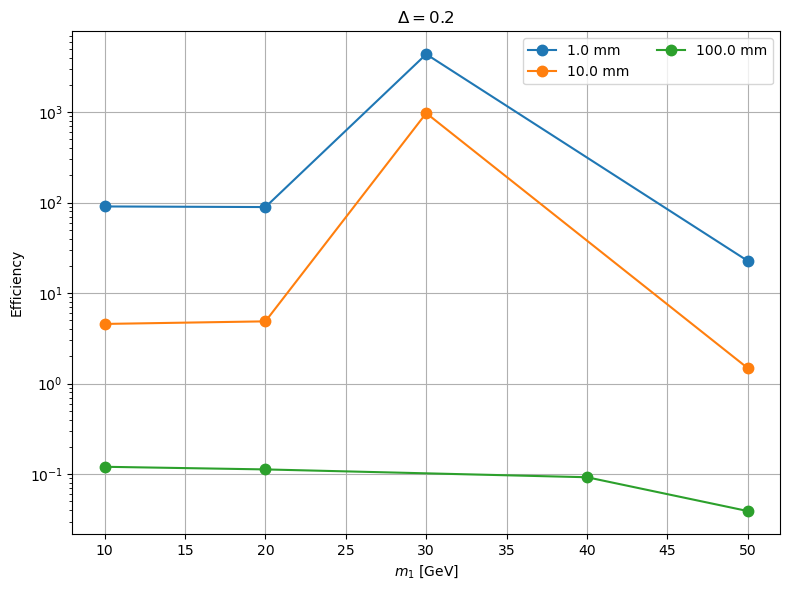

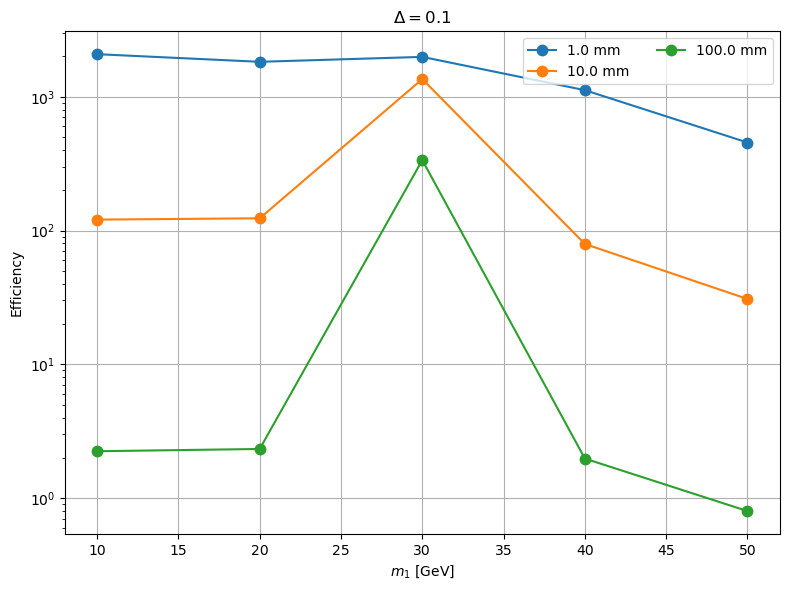

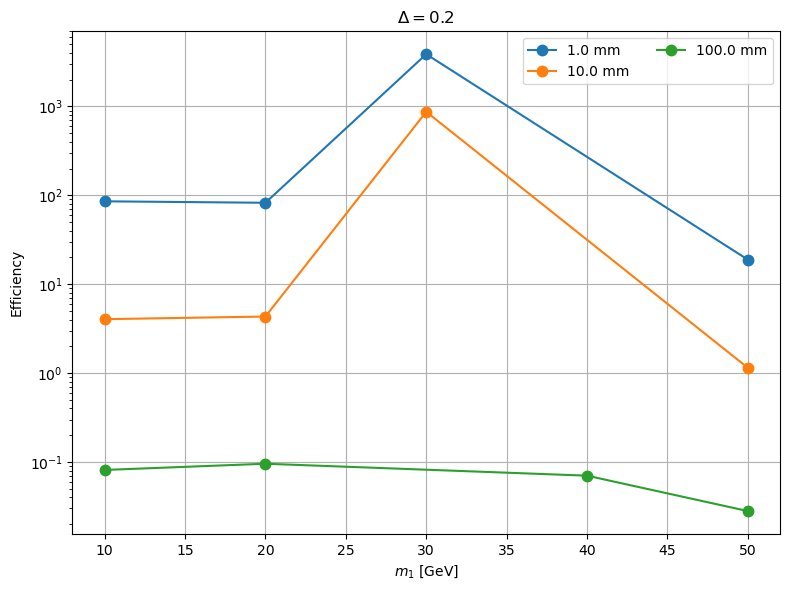

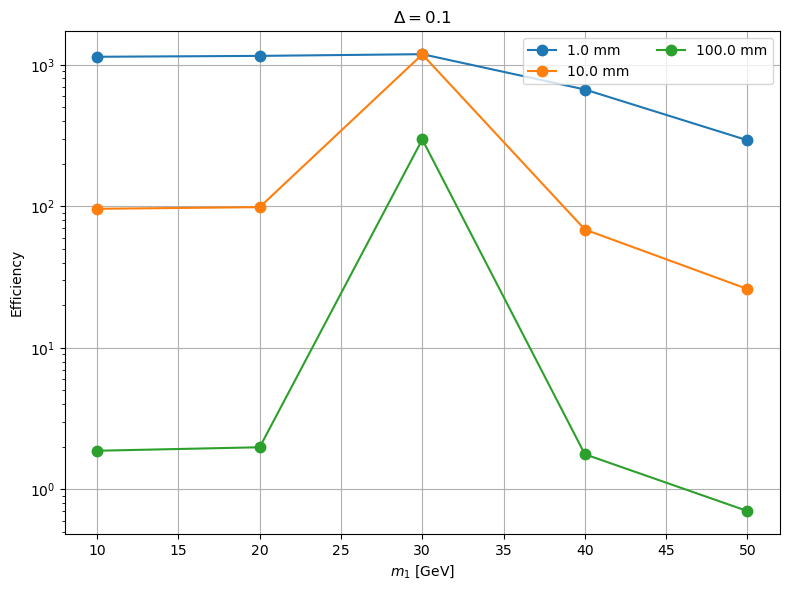

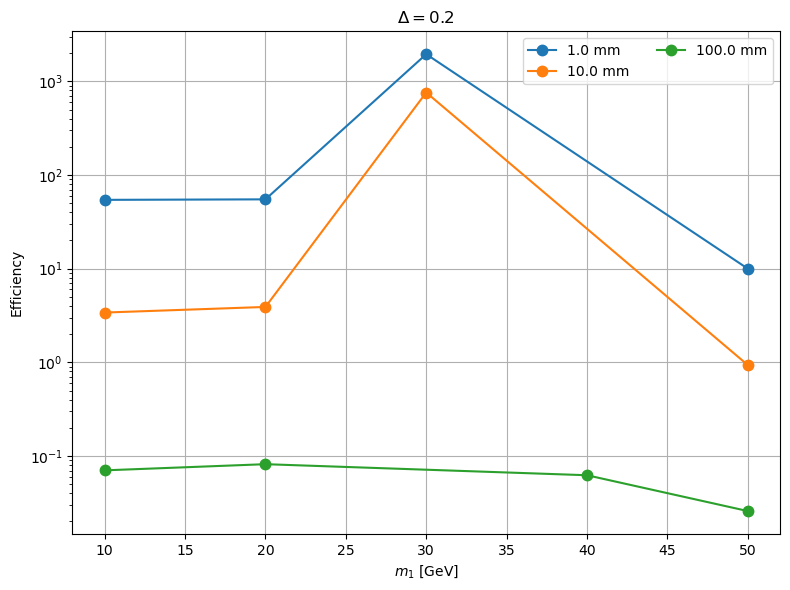

In [11]:
# signal counts by m1 (ctau overlay) on second to last cut
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for cut in ["cut7","cut8","cut9","cut10","cut11"]:
    for delta in deltas:
        all_m1s = sorted(list(set(si[si.delta==delta].m1)))
        plt.figure(figsize=(8,6))
        ctaus = sorted(list(set(si[si.delta==delta].ctau)))
        plt.title(r"$\Delta = {0:.1f}$".format(delta))
        for i,ct in enumerate(ctaus):
            m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
            effs = []
            for m1 in m1s:
                pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
                effs.append(ct_s[pt][cut])
            plt.plot(m1s,effs,label=f"{ct} mm",marker='.',markersize=15)
        plt.legend(loc='upper right',ncol=2)
        #plt.ylim([0.00001,1])
        plt.yscale('log')
        plt.ylabel("Efficiency")
        plt.xlabel("$m_1$ [GeV]")
        plt.grid()
        plt.tight_layout()
        plt.savefig(f"plots/cutflows/signal_{cut}_counts_delta{delta:.1f}.pdf")
        #plt.close()

# Bkg

In [27]:
tot_bkg_cts = {}
tot_bkg_effs = {}
total_bkg_counts = {b:sum([bkg['cutflow_cts'][b][k]['all']/bkg['cutflow'][b][k]['all'] for k in bkg['cutflow'][b].keys()]) for b in bkg['cutflow_cts'].keys()}
for b in bkg['cutflow_cts'].keys():
    cfd = bkg['cutflow_cts'][b]
    effd = bkg['cutflow'][b]
    cts_dict = {k:0 for k in cuts}
    for k in cfd.keys():
        for c in cuts:
            cts_dict[c] += cfd[k][c]
    tot_bkg_cts[b] = cts_dict
    tot_bkg_effs[b] = {c:cts_dict[c]/total_bkg_counts[b] for c in cuts}
bkg_summed_cts = {c:sum([tot_bkg_cts[b][c] for b in tot_bkg_cts.keys()]) for c in cuts}

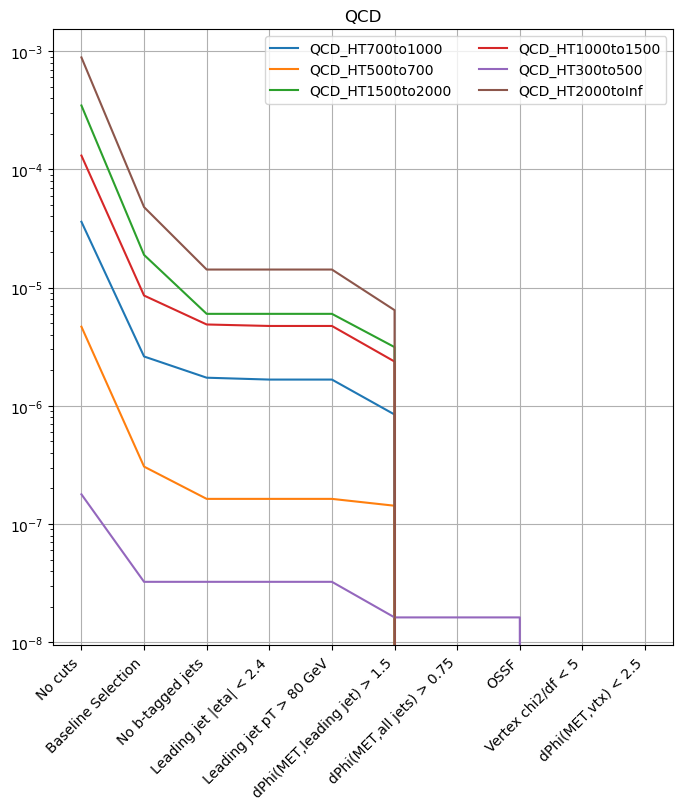

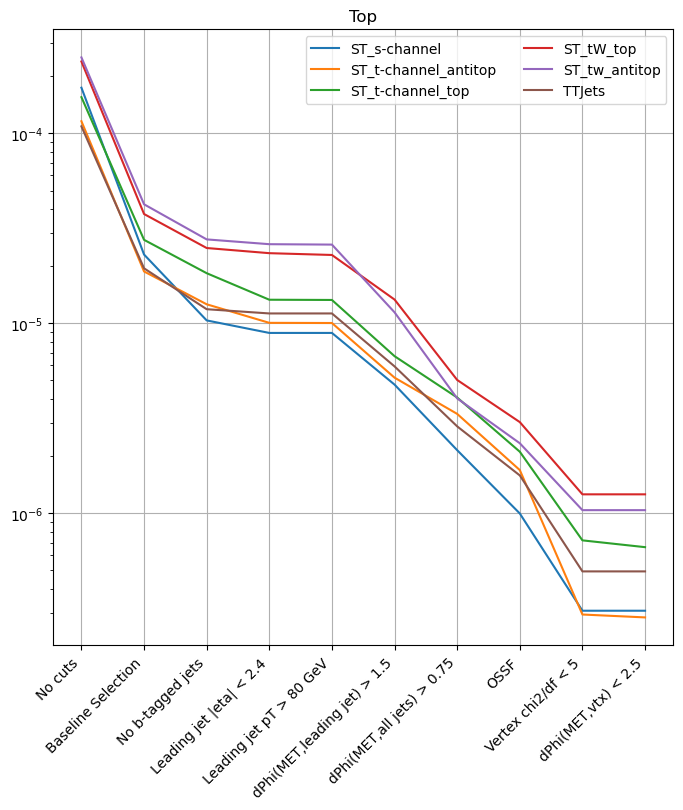

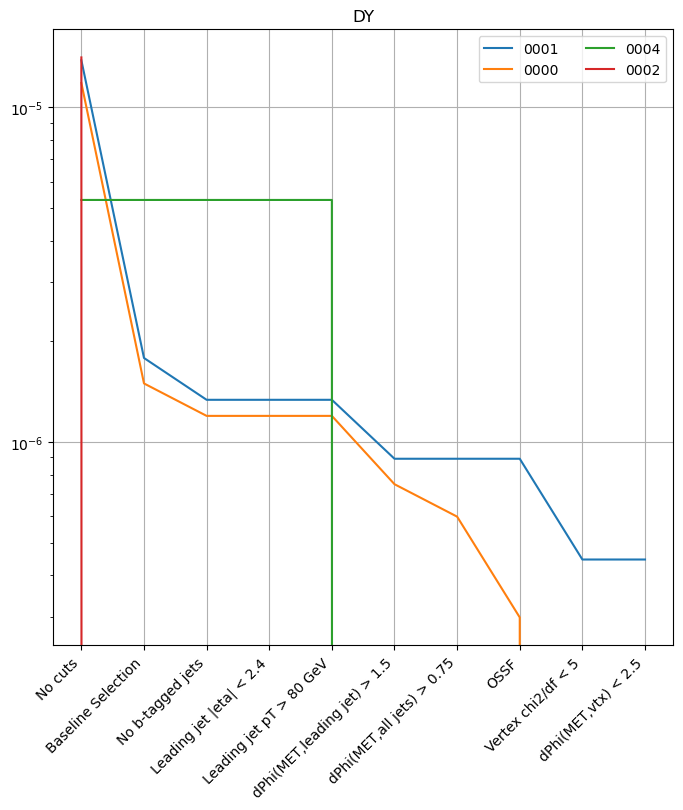

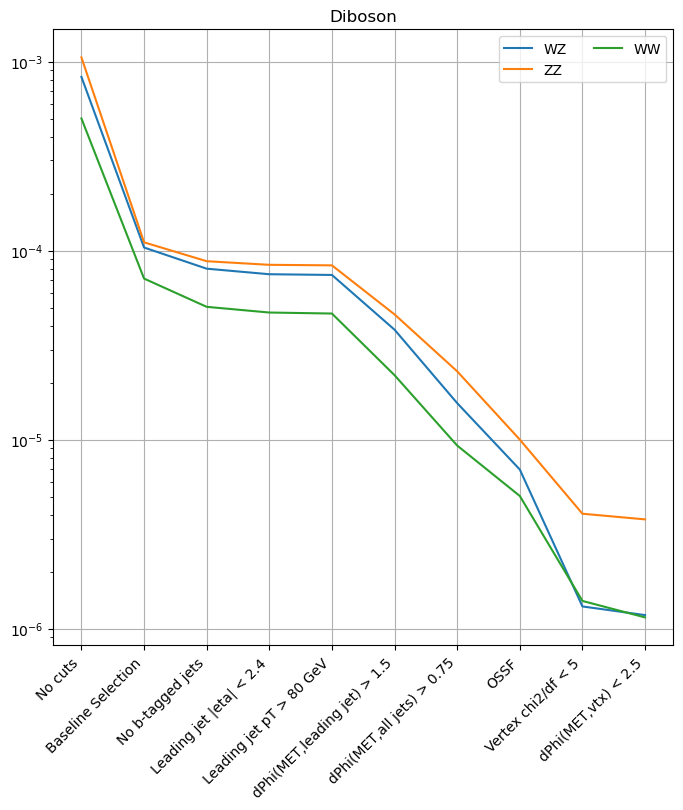

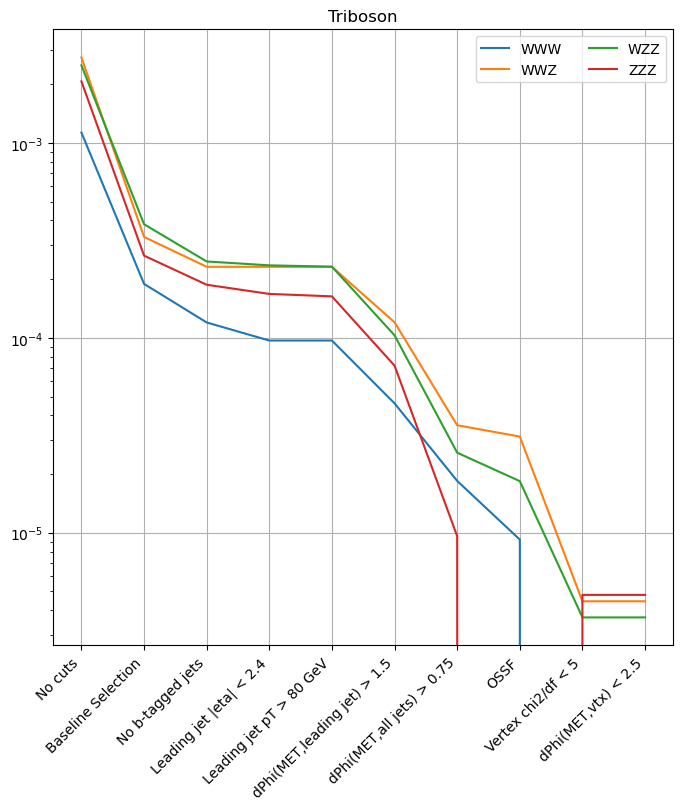

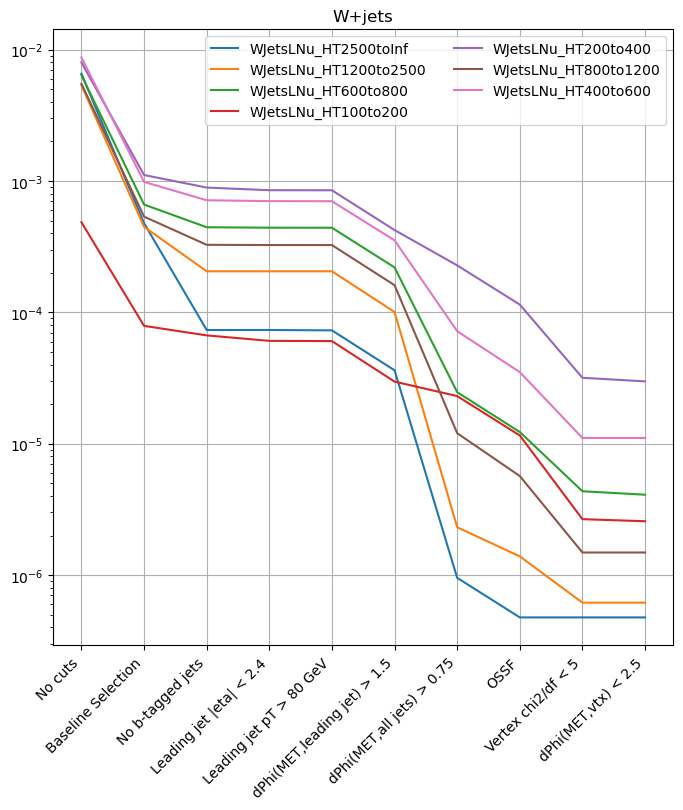

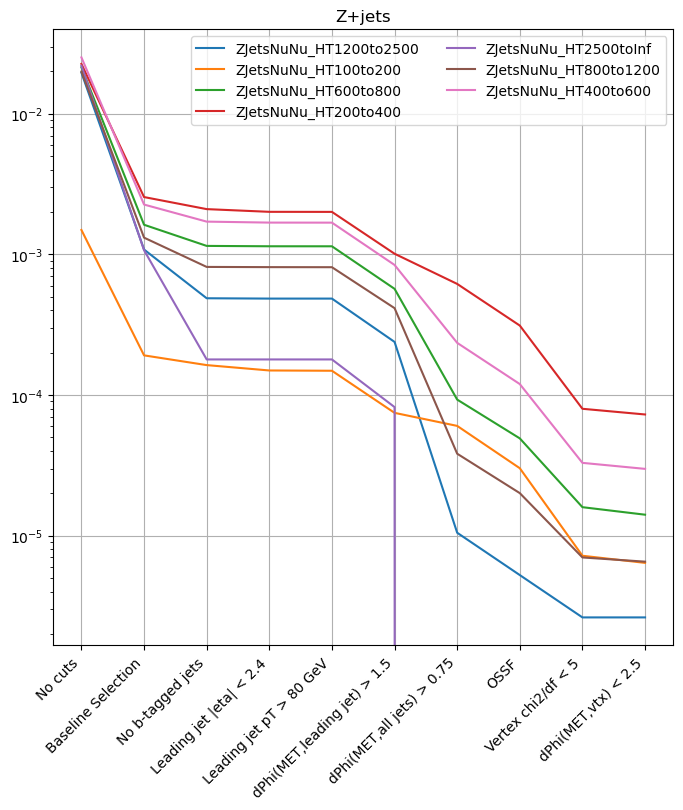

In [10]:
# bkg efficiencies in sub-samples (e.g. HT bins)
for b in bkg['cutflow'].keys():
    cfbs = bkg['cutflow'][b]
    plt.figure(figsize=(8,8))
    plt.title(b)
    subsamples = list(cfbs.keys())
    for bkg_pt in subsamples:
        cf = cfbs[bkg_pt]
        effs = [cf[c] for c in cuts]
        plt.plot(np.arange(len(effs)),effs,label=bkg_pt[9:])
    #plt.ylim([1e-12,1])
    plt.yscale('log')
    plt.legend(loc='upper right',ncol=2)
    plt.grid()
    #plt.xlabel("Cut Number")
    plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
    #plt.savefig(f"plots/cutflows/bkg_{b}_cutflow.pdf")
    #plt.close()

([<matplotlib.axis.XTick at 0x7f5b3c6bdf40>,
 [Text(0, 0, 'No cuts'),
  Text(1, 0, 'Baseline Selection'),
  Text(2, 0, 'No b-tagged jets'),
  Text(3, 0, 'Leading jet |eta| < 2.4'),
  Text(4, 0, 'Leading jet pT > 80 GeV'),
  Text(5, 0, 'dPhi(MET,leading jet) > 1.5'),
  Text(6, 0, 'dPhi(MET,all jets) > 0.75'),
  Text(7, 0, 'OSSF'),
  Text(8, 0, 'Vertex chi2/df < 5'),
  Text(9, 0, 'dPhi(MET,vtx) < 2.5')])

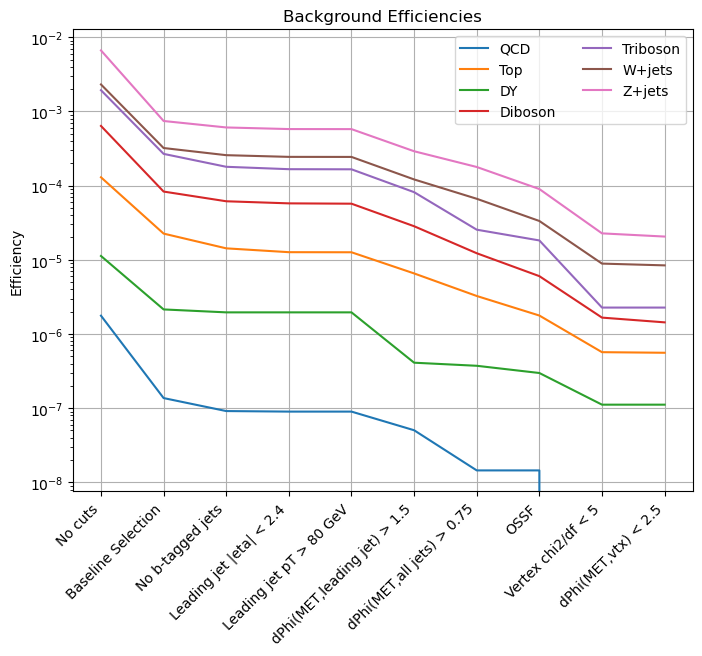

In [11]:
# bkg efficiencies summed over sub-samples
plt.figure(figsize=(8,6))
plt.title("Background Efficiencies")
for b in bkg['cutflow'].keys():
    cfbs = tot_bkg_effs[b]
    effs = [cfbs[c] for c in cuts]
    plt.plot(np.arange(len(effs)),effs,label=b)
    #plt.ylim([1e-12,1])
plt.yscale('log')
plt.ylabel("Efficiency")
plt.legend(loc='upper right',ncol=2)
plt.grid()
plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
#plt.savefig(f"plots/cutflows/bkg_combined_cutflow.pdf")

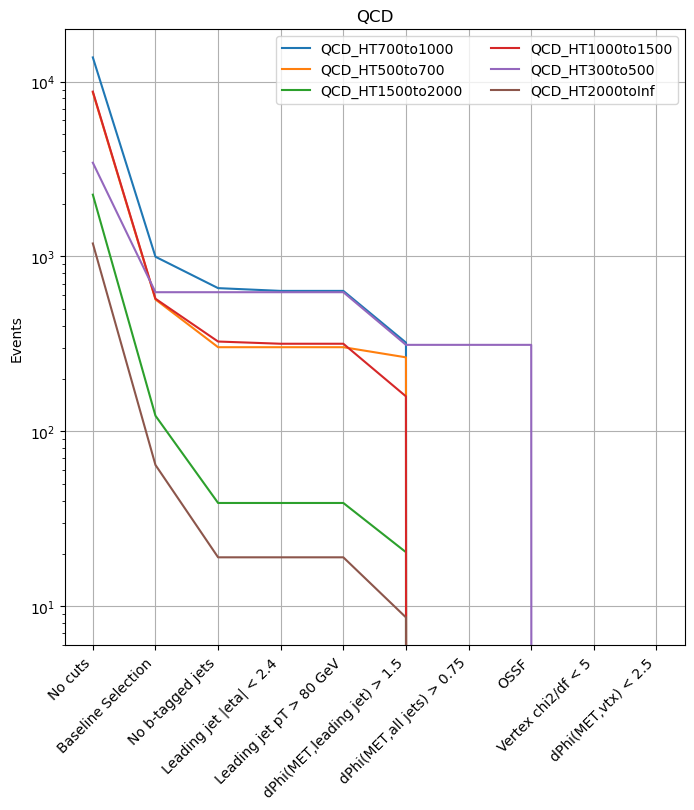

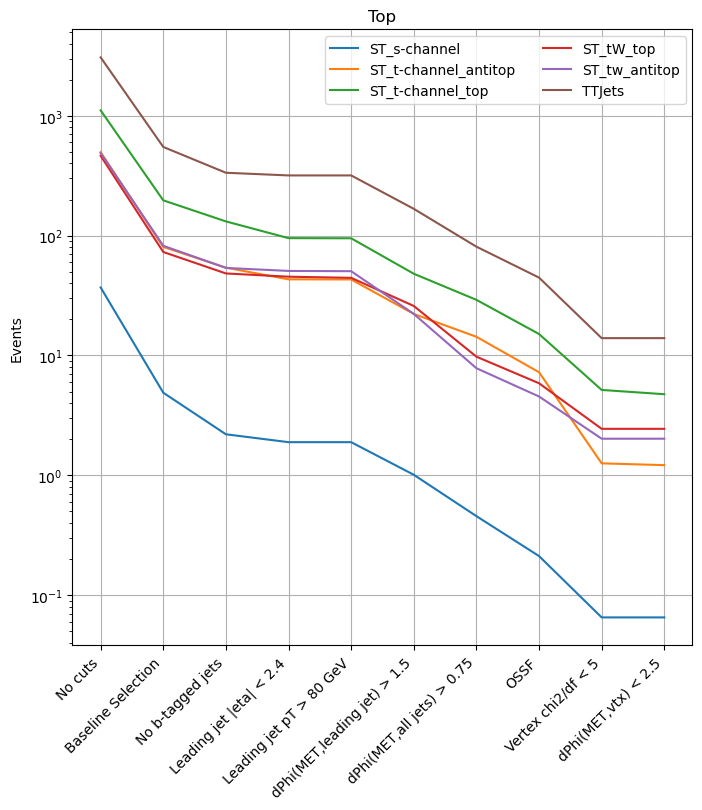

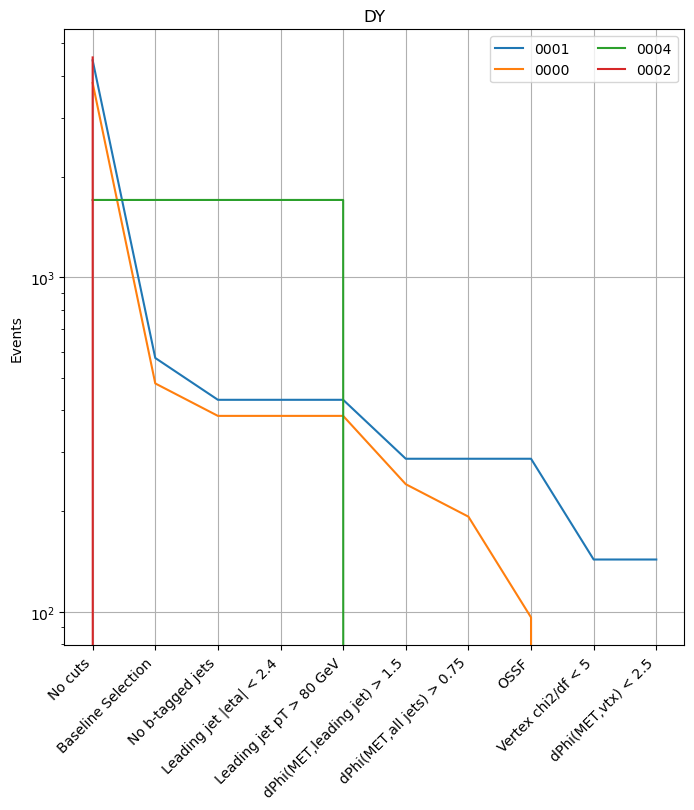

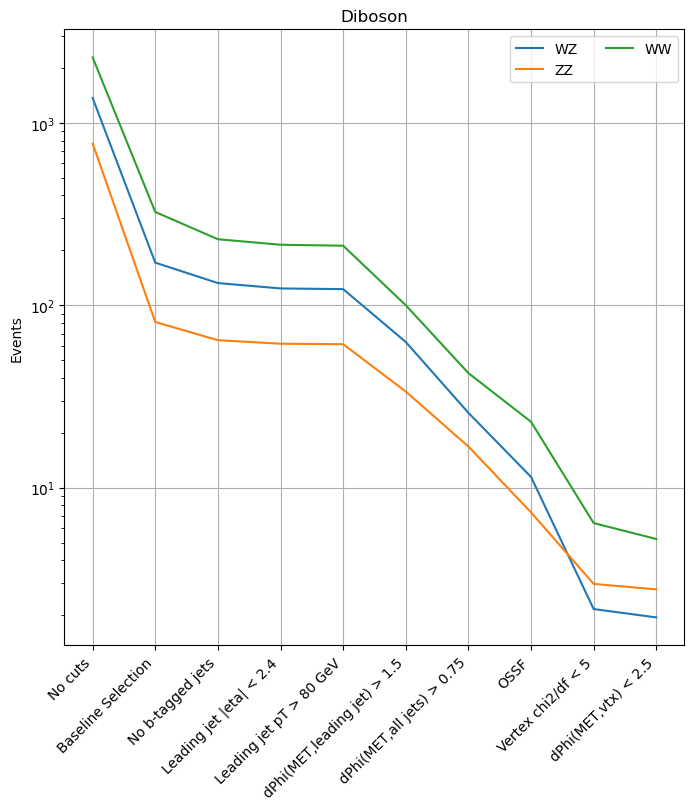

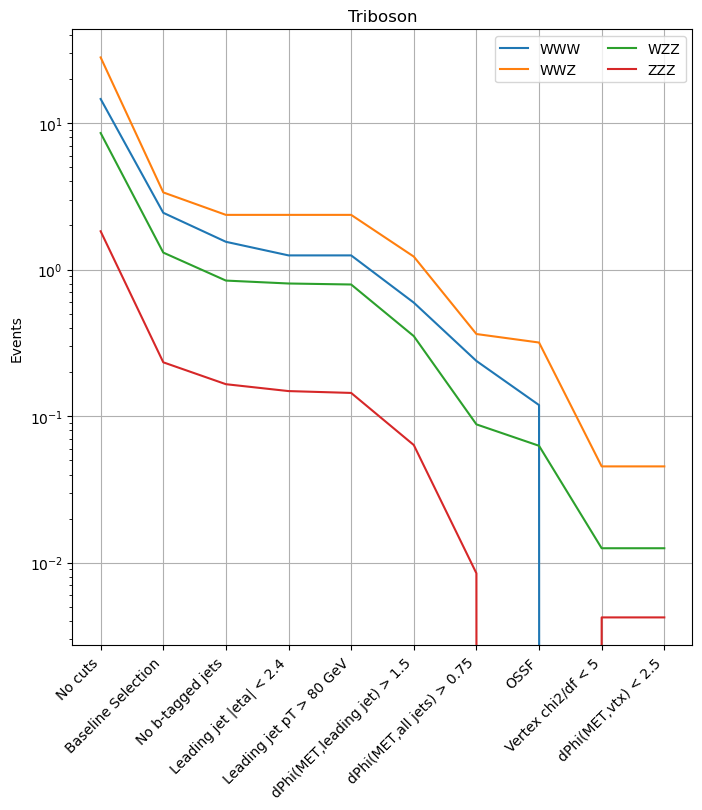

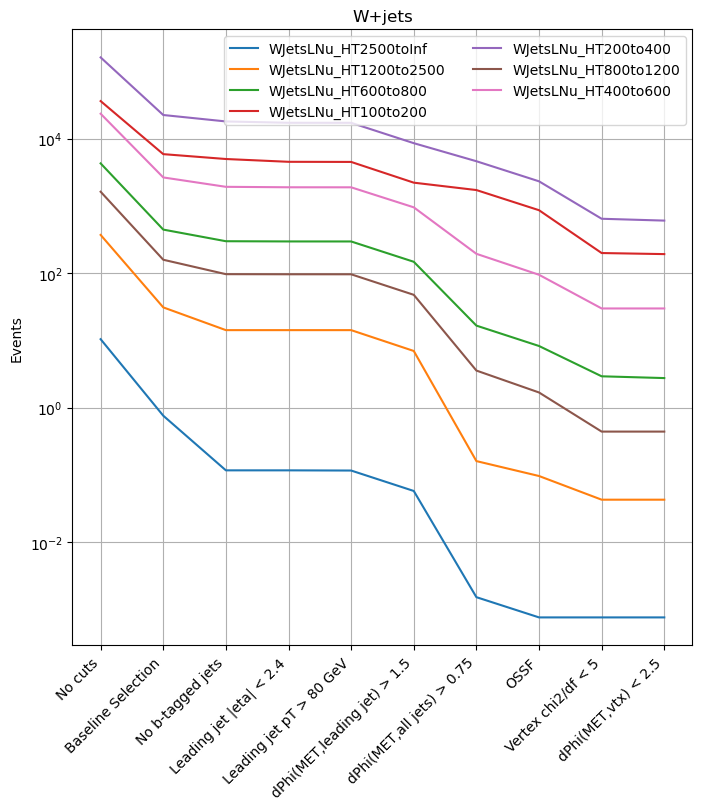

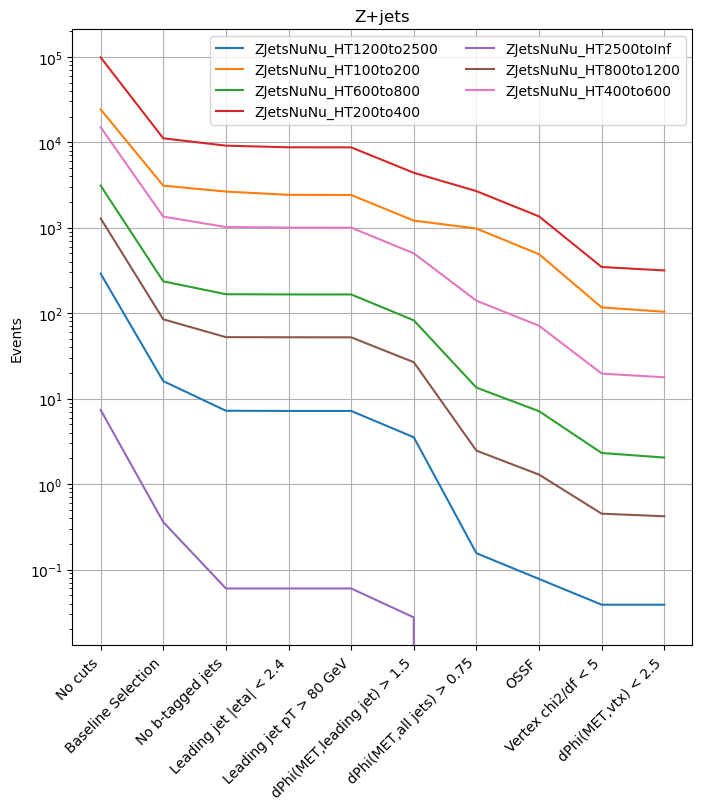

In [12]:
# bkg counts
for b in bkg['cutflow'].keys():
    cfbs = bkg['cutflow_cts'][b]
    plt.figure(figsize=(8,8))
    plt.title(b)
    subsamples = list(cfbs.keys())
    for bkg_pt in subsamples:
        cf = cfbs[bkg_pt]
        effs = [cf[c] for c in cuts]
        plt.plot(np.arange(len(effs)),effs,label=bkg_pt[9:])
    #plt.ylim([1e-12,1])
    plt.yscale('log')
    plt.ylabel('Events')
    plt.legend(loc='upper right',ncol=2)
    plt.grid()
    #plt.xlabel("Cut Number")
    plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
    #plt.savefig(f"plots/cutflows/bkg_{b}_counts_pdf")
    #plt.close()

([<matplotlib.axis.XTick at 0x7f5b3517c6a0>,
 [Text(0, 0, 'No cuts'),
  Text(1, 0, 'Baseline Selection'),
  Text(2, 0, 'No b-tagged jets'),
  Text(3, 0, 'Leading jet |eta| < 2.4'),
  Text(4, 0, 'Leading jet pT > 80 GeV'),
  Text(5, 0, 'dPhi(MET,leading jet) > 1.5'),
  Text(6, 0, 'dPhi(MET,all jets) > 0.75'),
  Text(7, 0, 'OSSF'),
  Text(8, 0, 'Vertex chi2/df < 5'),
  Text(9, 0, 'dPhi(MET,vtx) < 2.5')])

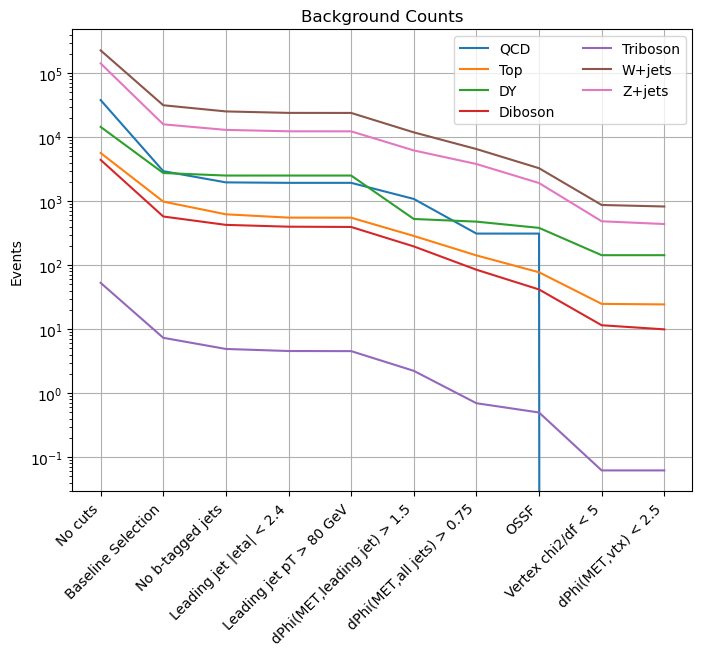

In [13]:
# bkg counts summed over sub-samples
plt.figure(figsize=(8,6))
plt.title("Background Counts")
for b in bkg['cutflow'].keys():
    cfbs = tot_bkg_cts[b]
    cts = [cfbs[c] for c in cuts]
    plt.plot(np.arange(len(cts)),cts,label=b)
    #plt.ylim([1e-12,1])
plt.yscale('log')
plt.ylabel('Events')
plt.legend(loc='upper right',ncol=2)
plt.grid()
plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
#plt.savefig(f"plots/cutflows/bkg_combined_counts.pdf")

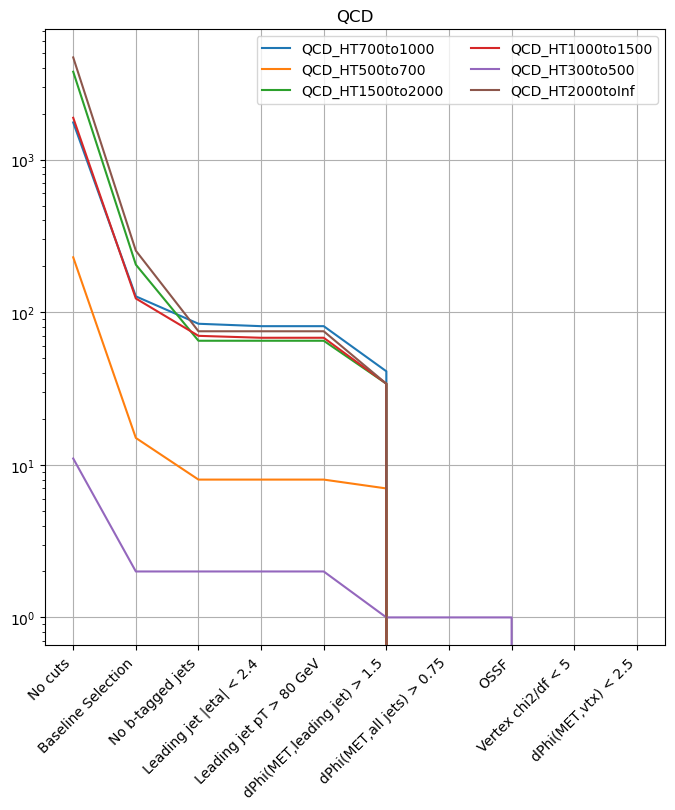

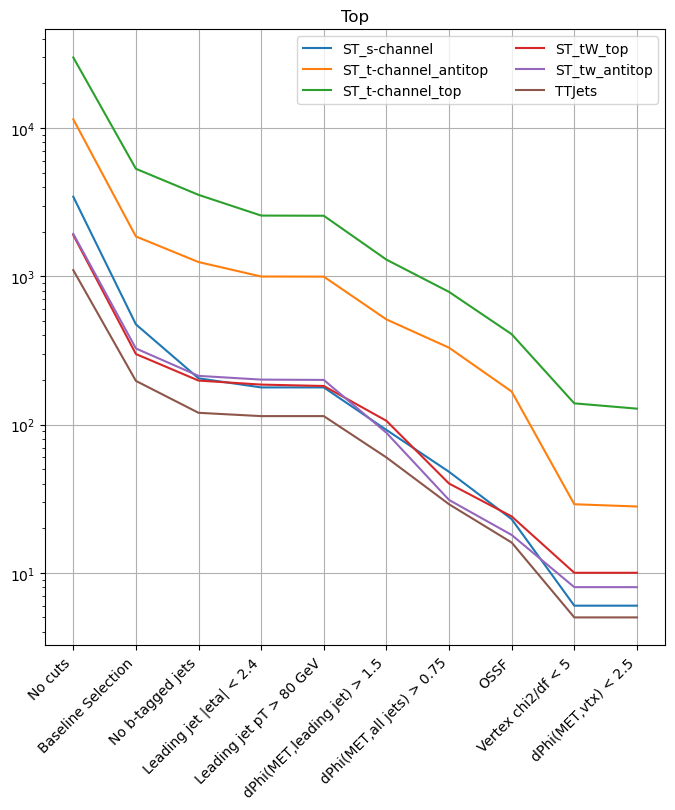

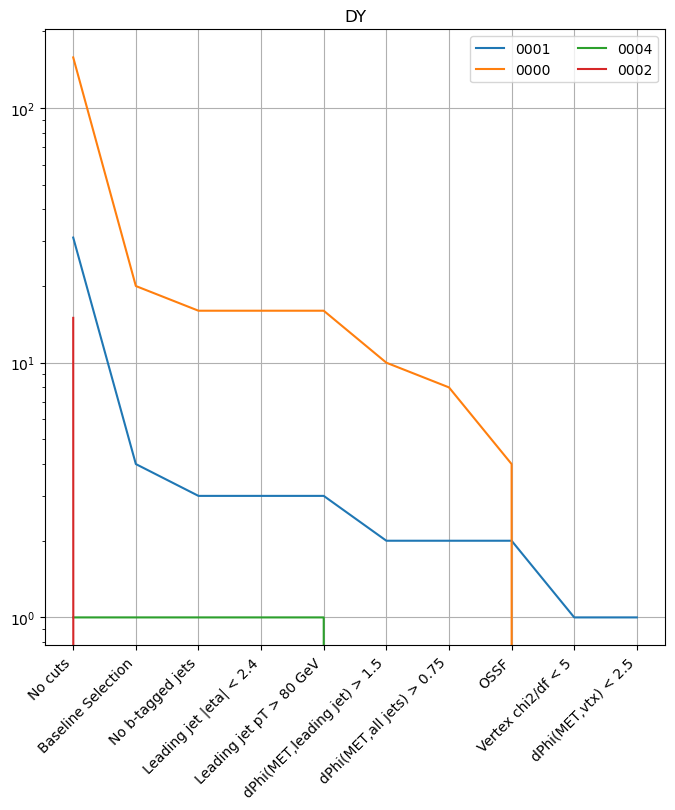

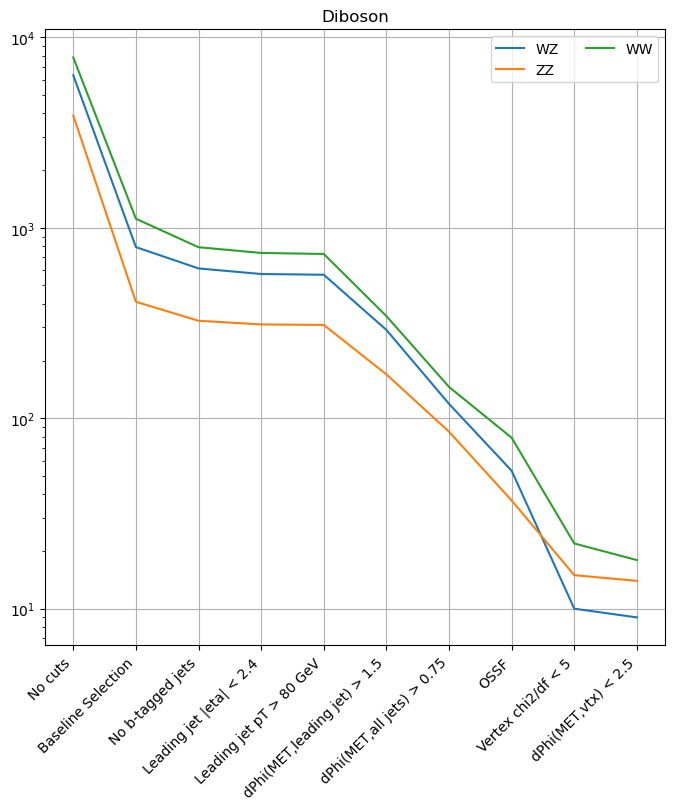

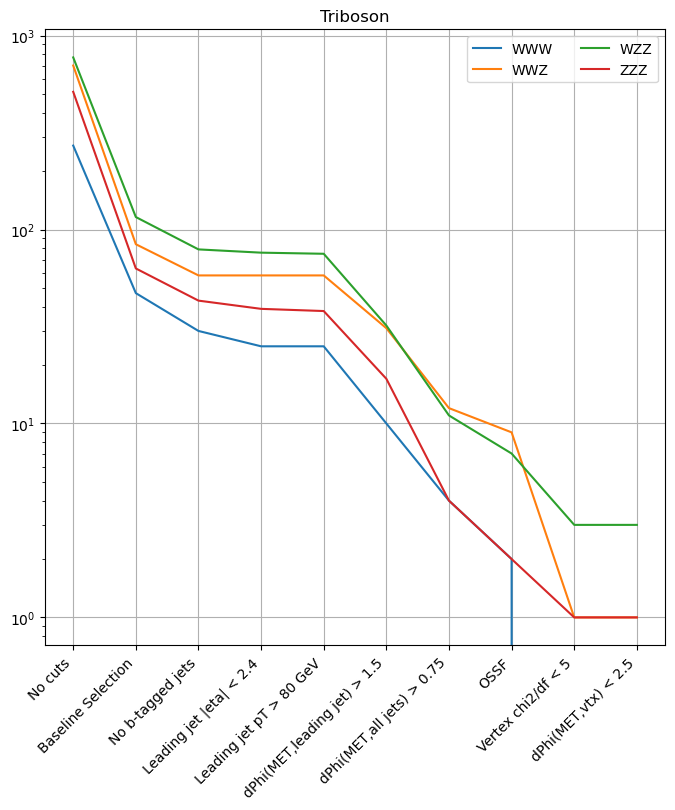

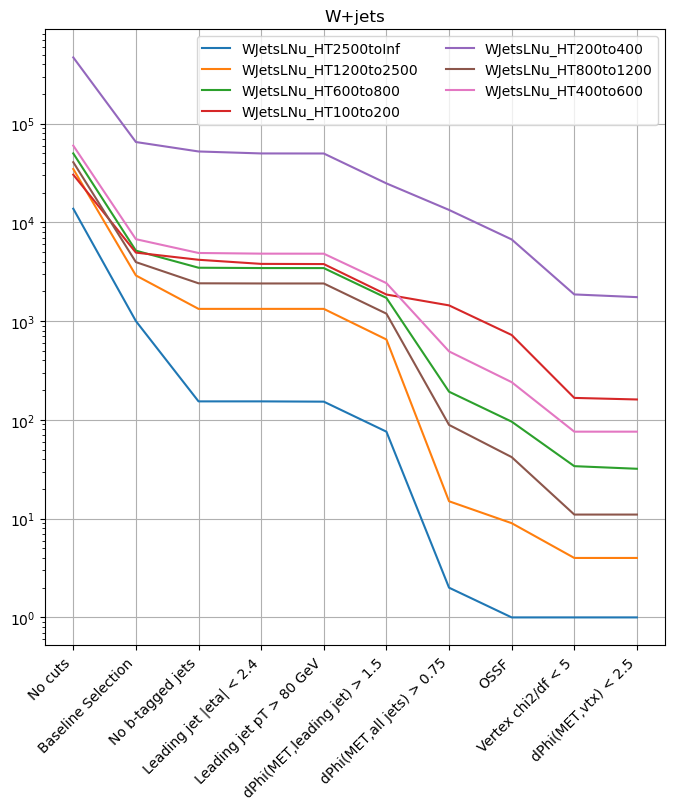

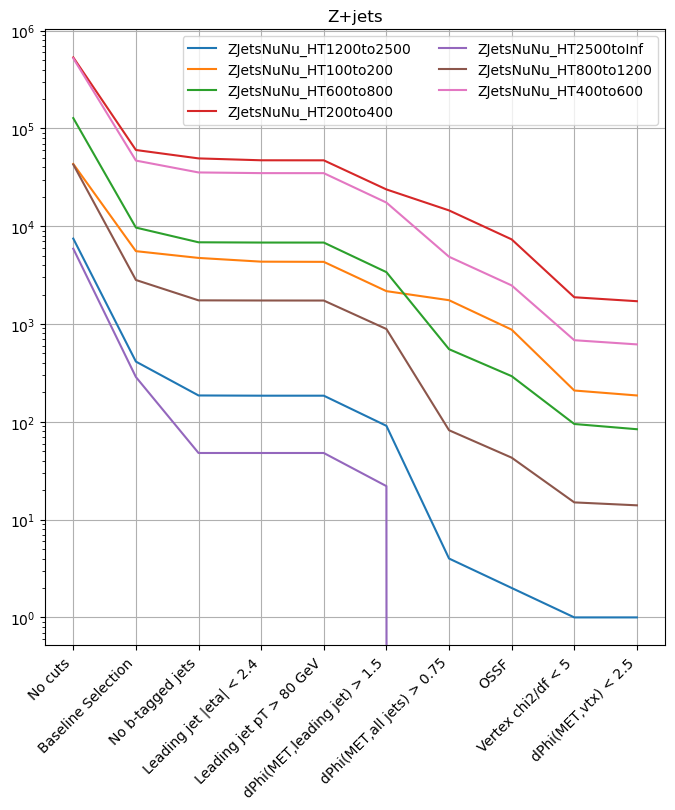

In [15]:
# bkg nevts
for b in bkg['cutflow'].keys():
    cfbs = bkg['cutflow_nevts'][b]
    plt.figure(figsize=(8,8))
    plt.title(b)
    subsamples = list(cfbs.keys())
    for bkg_pt in subsamples:
        cf = cfbs[bkg_pt]
        effs = [cf[c] for c in cuts]
        plt.plot(np.arange(len(effs)),effs,label=bkg_pt[9:])
    #plt.ylim([1e-12,1])
    plt.yscale('log')
    plt.legend(loc='upper right',ncol=2)
    plt.grid()
    #plt.xlabel("Cut Number")
    plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
    #plt.savefig(f"plots/cutflows/bkg_{b}_counts_pdf")
    #plt.close()

# signal vs bkg

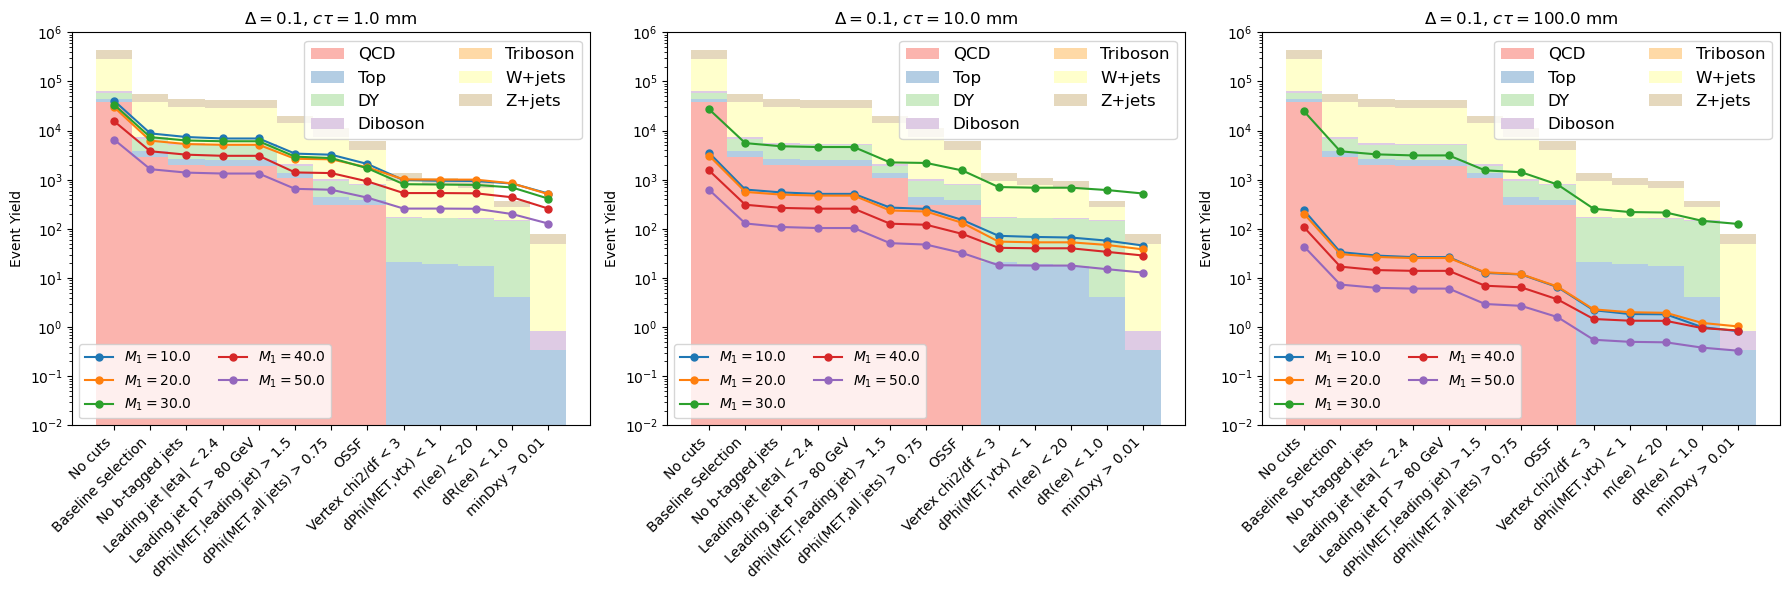

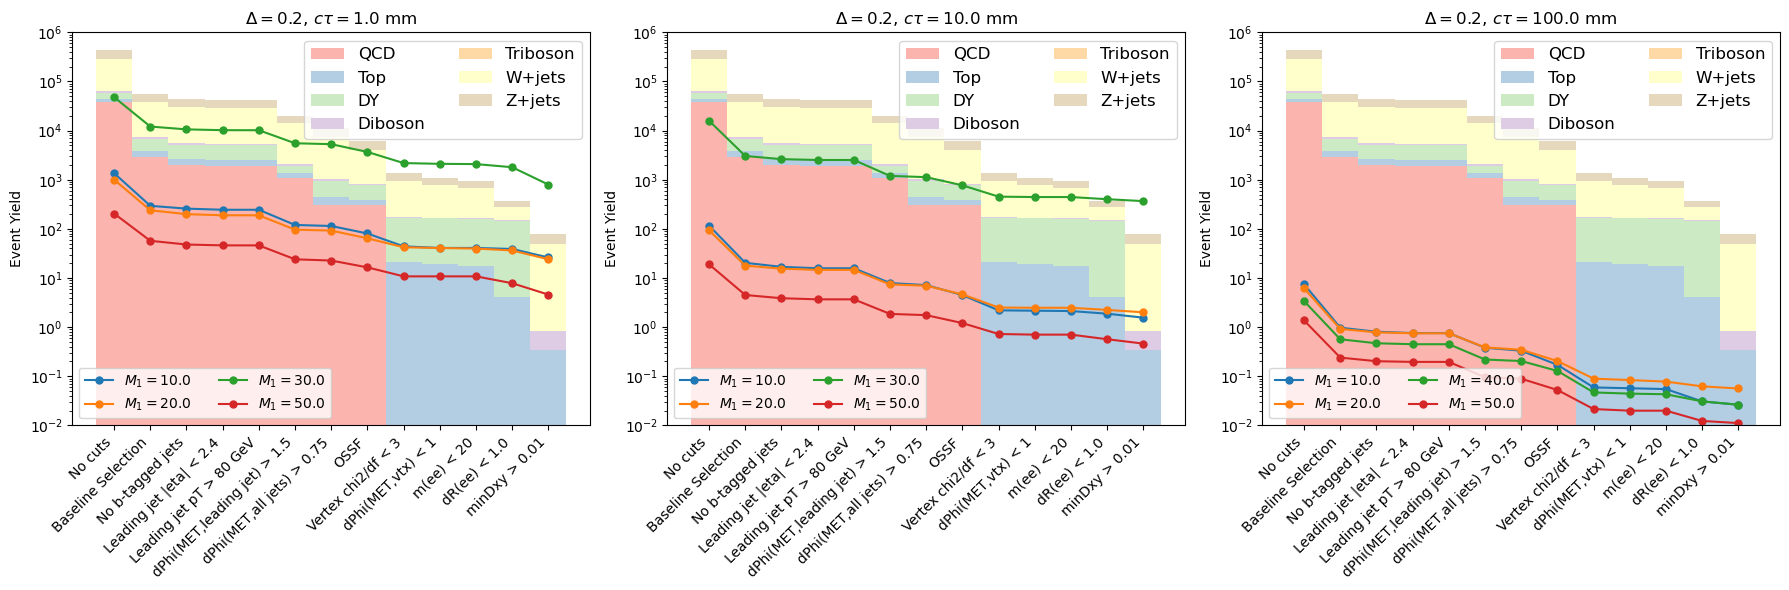

In [28]:
backgrounds = list(tot_bkg_cts.keys())

for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        plt.sca(axes[i])
        bkg_labels = []
        bkg_heights = []
        bottoms = np.array([0.0 for c in cuts])
        cmap = plt.get_cmap('Pastel1')
        bars = []
        for j,b in enumerate(backgrounds):
            heights = [tot_bkg_cts[b][c] for c in cuts]
            x = np.arange(len(cuts))
            bars.append(plt.bar(x,heights,width=1,align='center',bottom=bottoms,color=cmap(j)))
            bottoms += np.array(heights)
        leg1 = plt.legend(bars,backgrounds,loc='upper right',fontsize=12,ncol=2)
        ax = plt.gca().add_artist(leg1)
        
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        lines = []
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs = [sig['cutflow_cts'][pt][cut] for cut in cuts]
            l, = plt.plot(np.arange(len(cuts)),effs,label=r"$M_1 = {0}$".format(m1),marker='.',markersize=10)
            lines.append(l)
        plt.legend(handles=lines,loc='lower left',ncol=2)
        plt.ylim([1e-2,1e6])
        #plt.xlim([3,11])
        plt.yscale('log')
        plt.ylabel("Event Yield")
        #plt.xlabel("Cut Number")
        plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
        #plt.grid()
    plt.tight_layout()
    #plt.savefig(f"plots/cutflows/signal_vs_itemizedBkg_counts_delta{delta:.1f}.pdf")
    #plt.close()

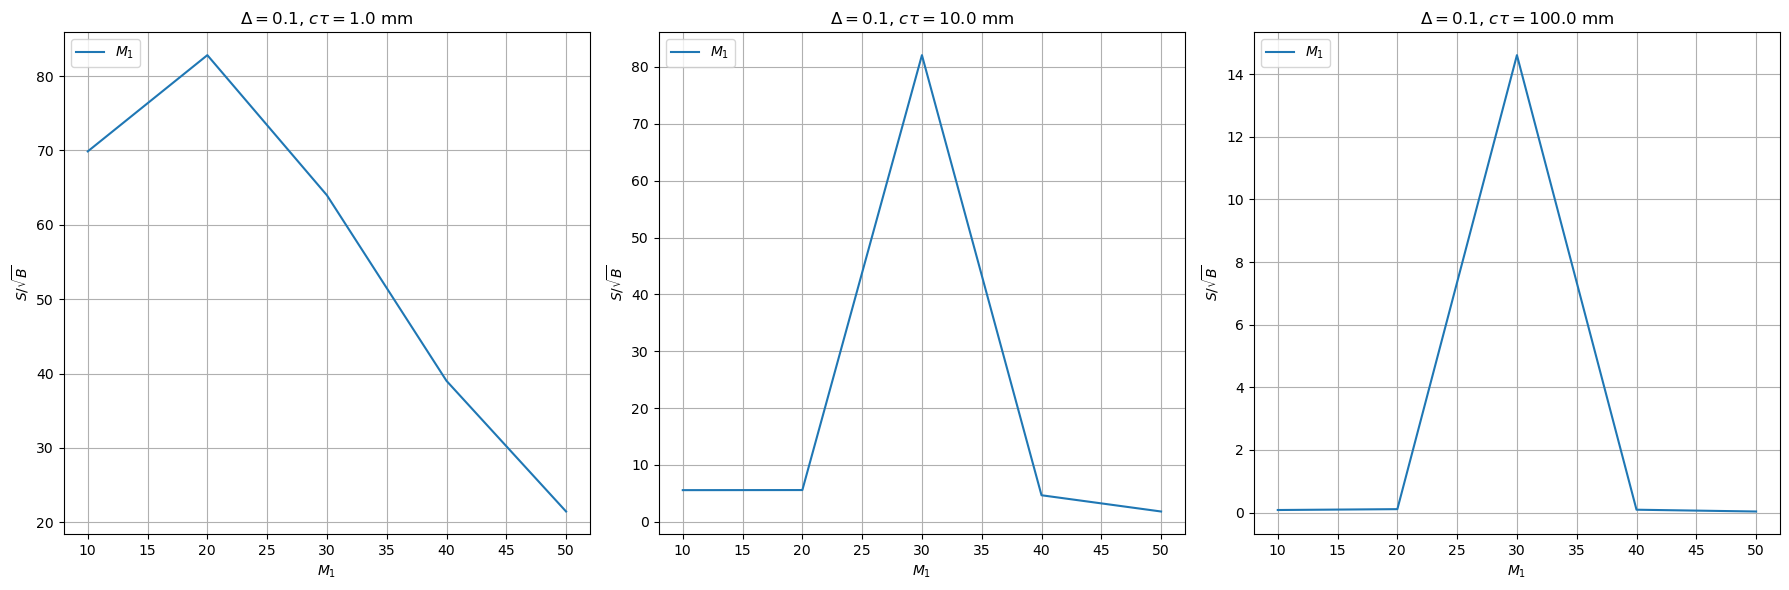

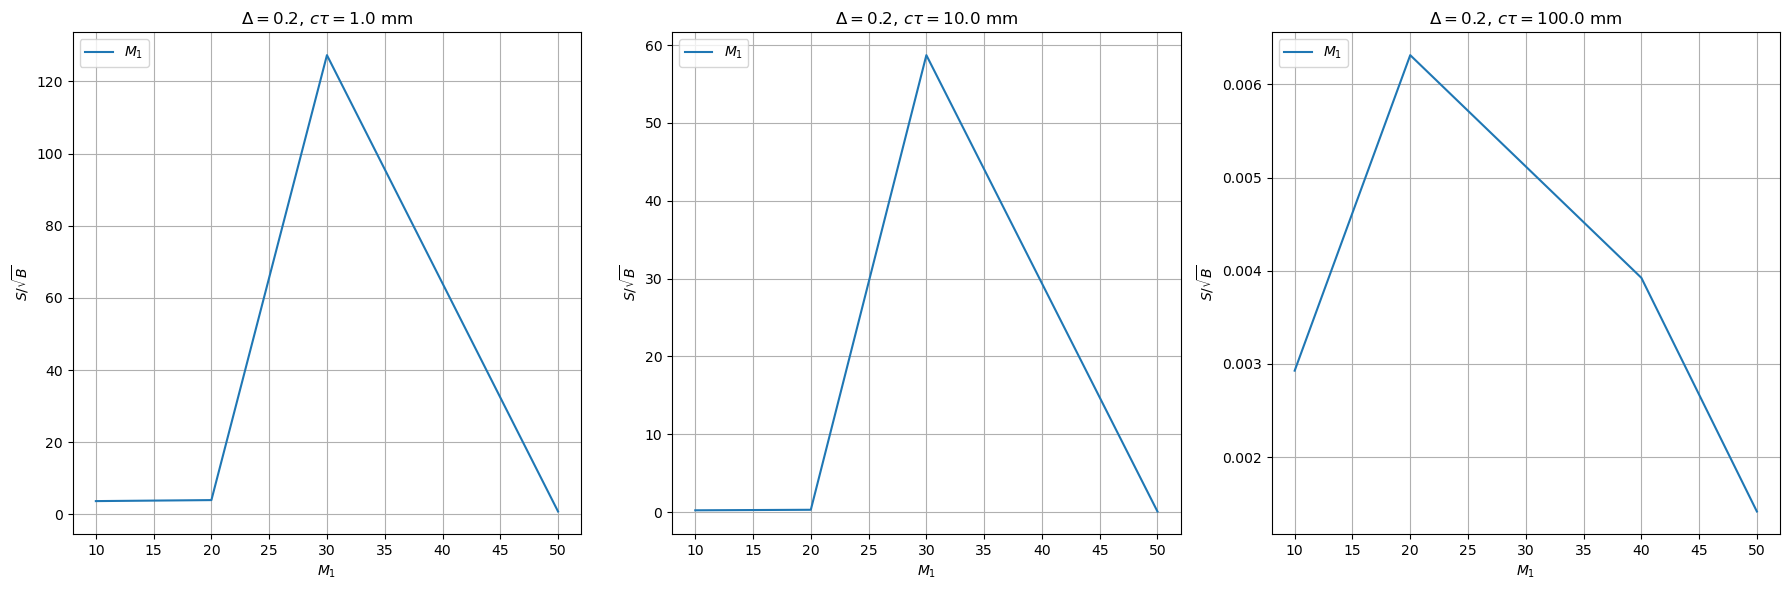

In [30]:
# S/sqrt(B) by mass
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        plt.sca(axes[i])
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        effs = []
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs.append(ct_s[pt][cuts[-1]]/np.sqrt(bkg_summed_cts[cuts[-1]]))
        plt.plot(m1s,effs,label=r"$M_1$".format(m1))
        plt.legend(loc='upper left',ncol=2)
        plt.ylabel(r"$S/\sqrt{B}$")
        plt.xlabel(r"$M_1$")
        plt.grid()
    plt.tight_layout()
    #plt.savefig(f"plots/cutflows/signal_signif_delta{delta:.1f}.pdf")
    #plt.close()

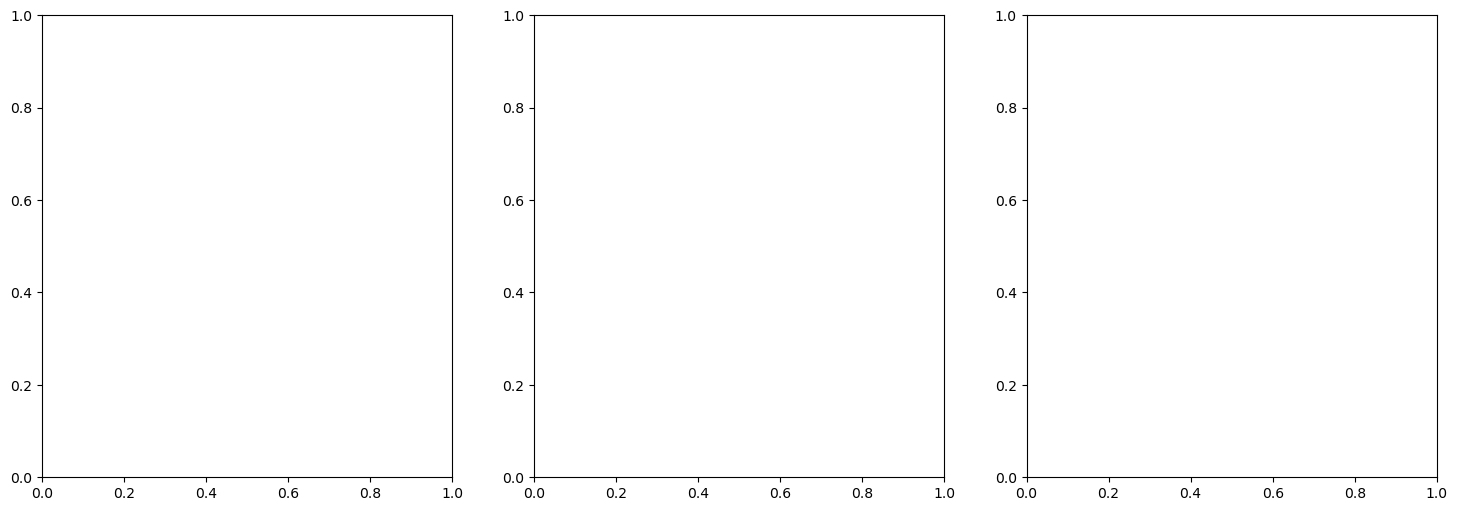

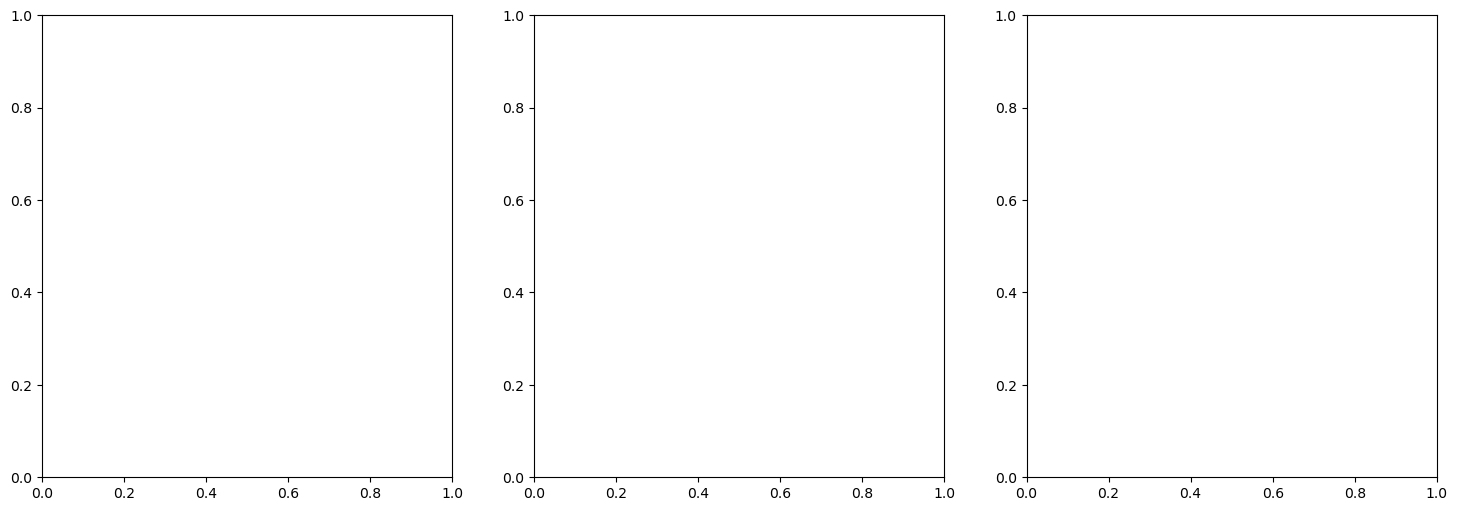

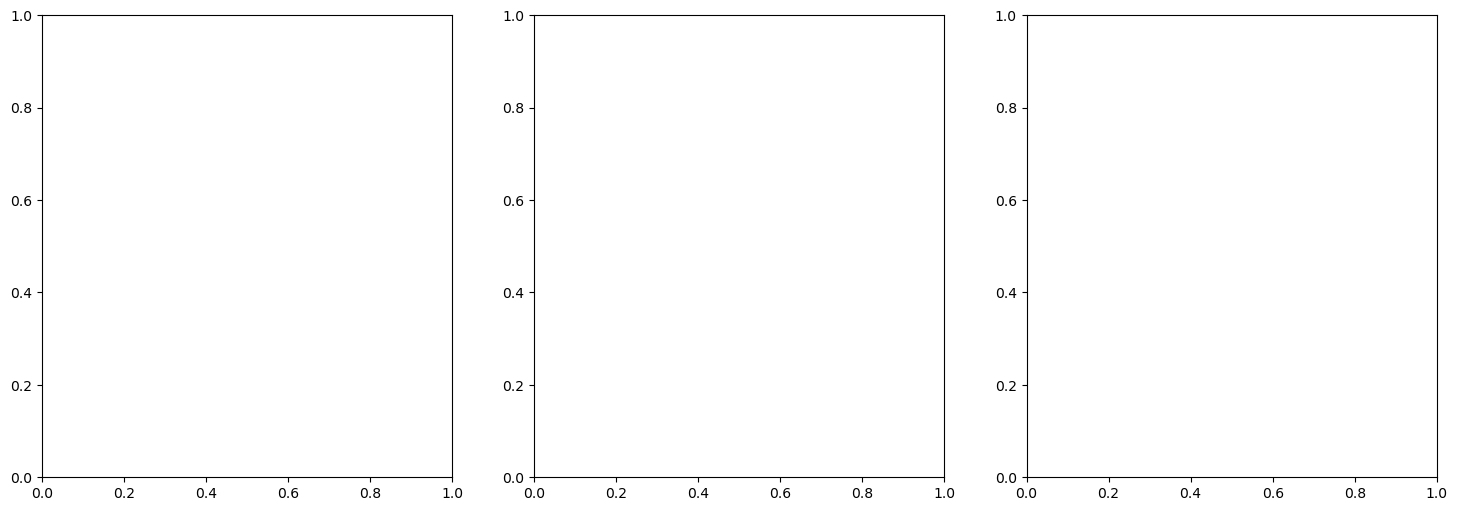

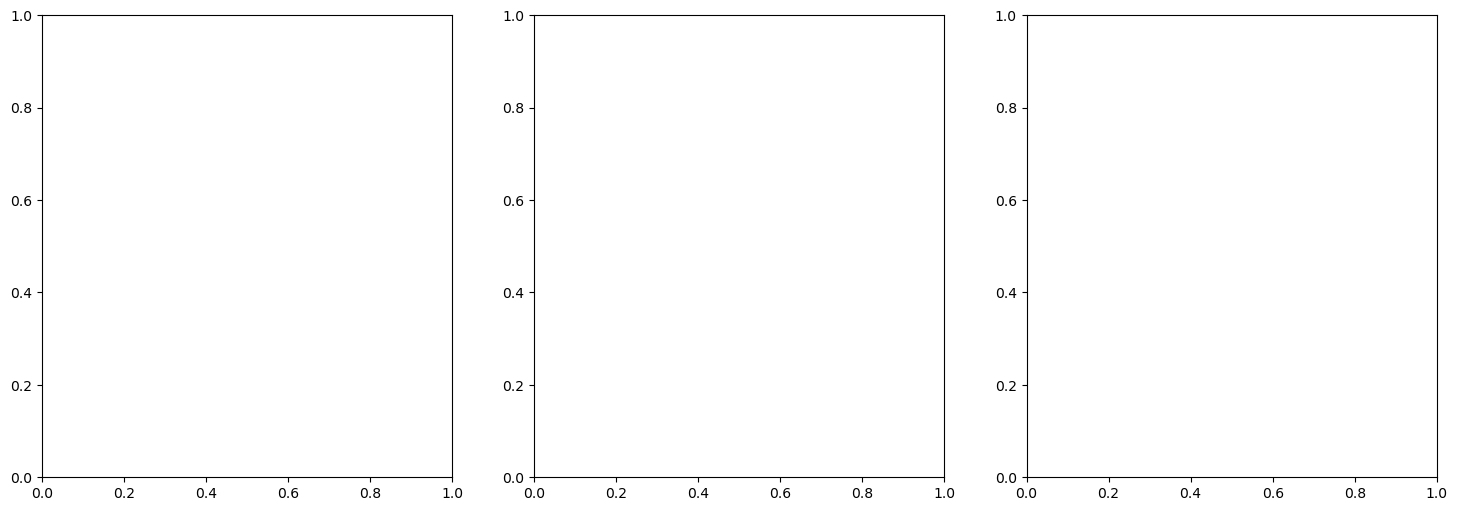

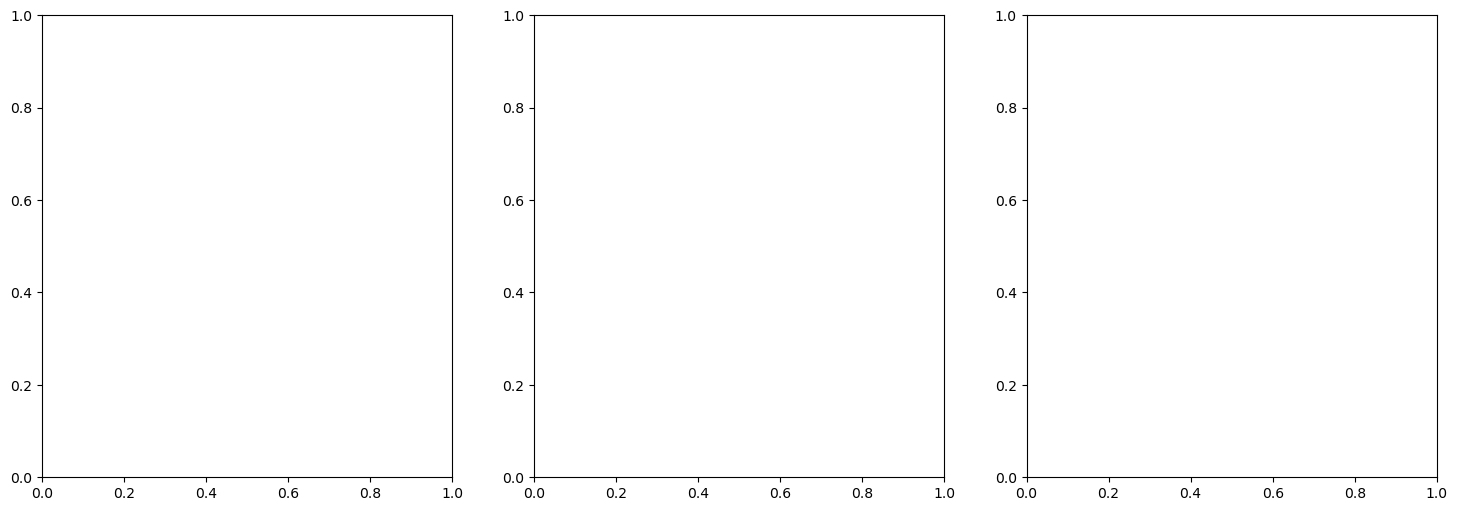

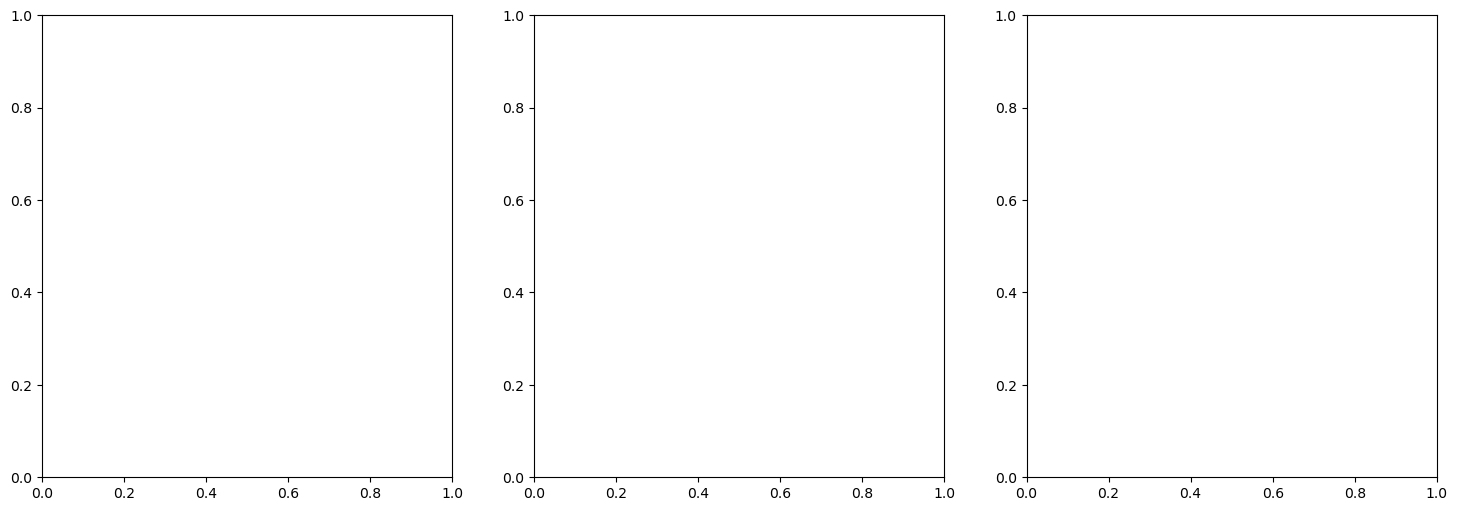

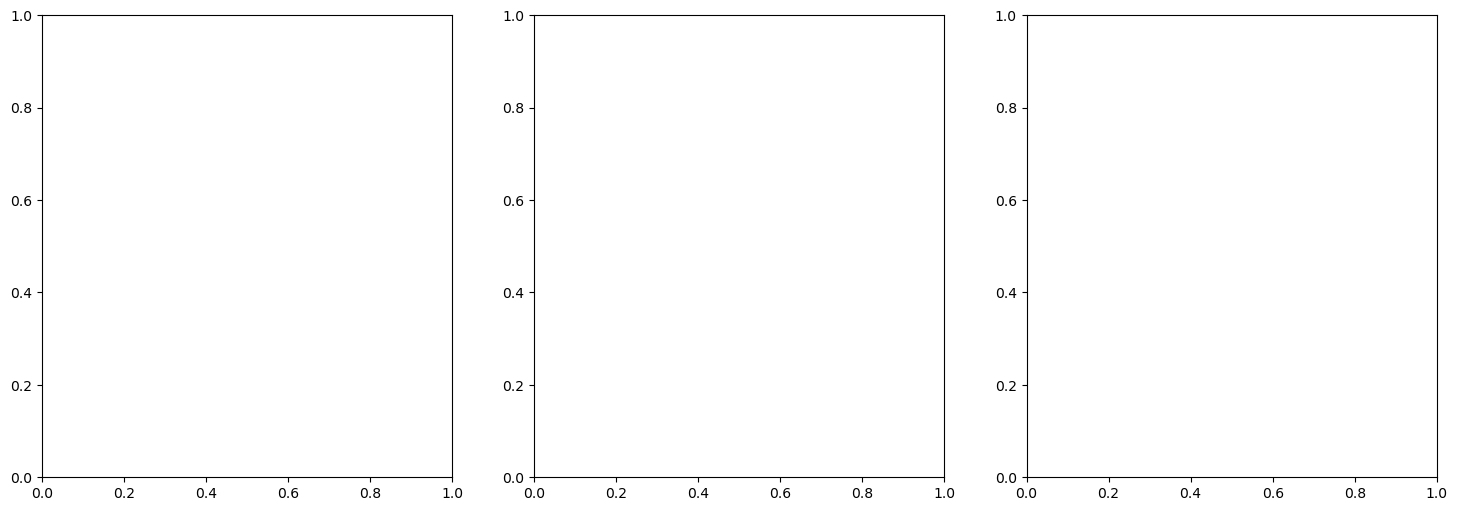

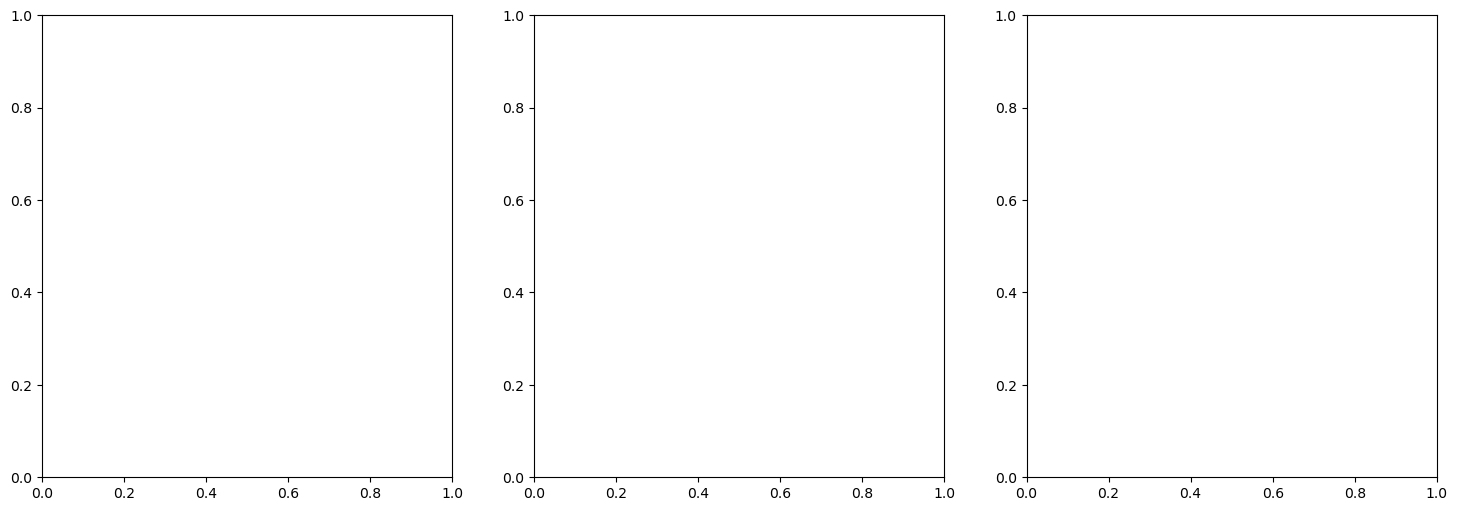

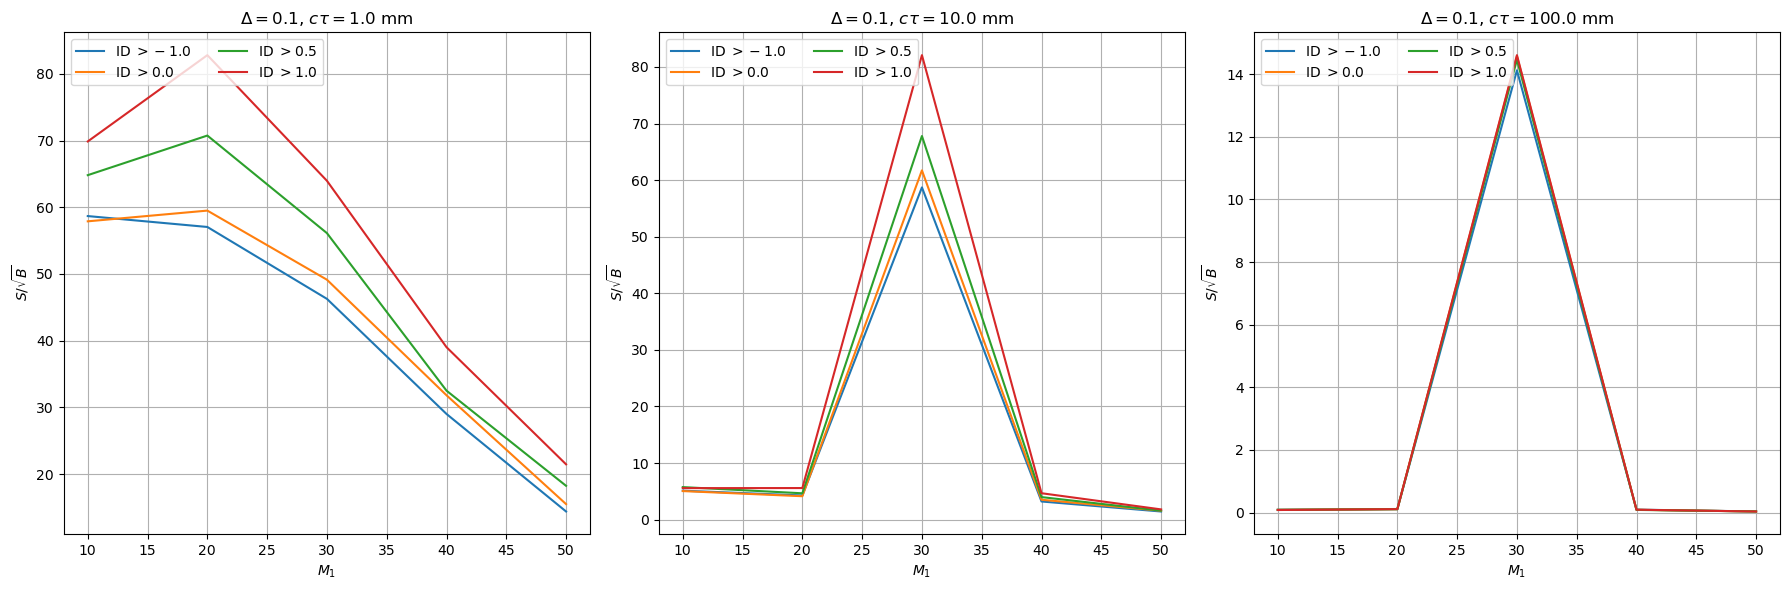

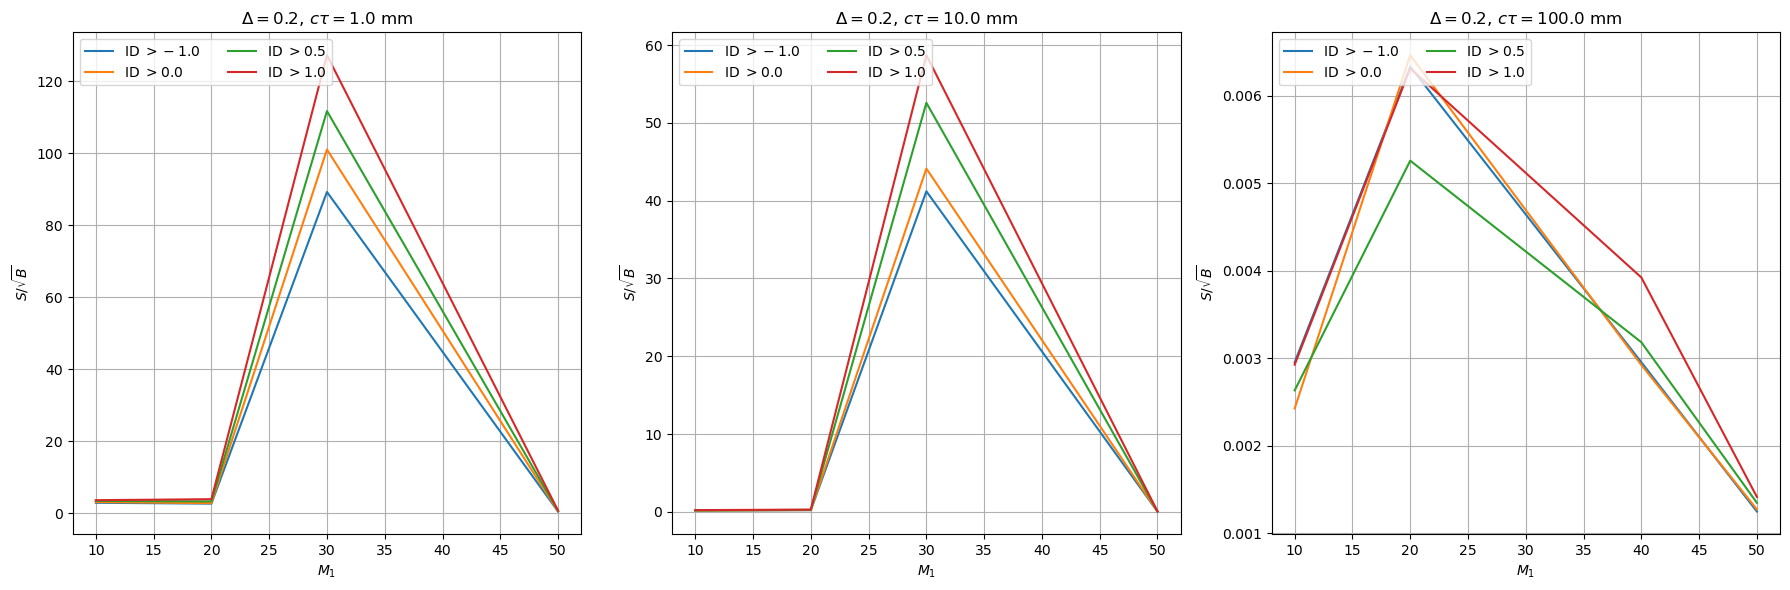

In [30]:
str_lt = ["_ID-all","_ID-0p0","_ID-0p5","_ID-1p0"]
lbl_lt = [-1.0,0.0,0.5,1.0]
y = []
deltas = []
ctaus = []
x = []

for str in str_lt:
    f_sig = str+"/skimmed_signal_v2_2018_aEM"+str+".coffea"
    sig = util.load(f_sig)[0]
    
    bkg_files = {
        "QCD":str+"/skimmed_bkg_2018_QCD_TuneCP5_PSWeights"+str+".coffea",
        "Top":str+"/skimmed_bkg_2018_Top"+str+".coffea",
        "DY":str+"/skimmed_bkg_2018_DY"+str+".coffea",
        "Diboson":str+"/skimmed_bkg_2018_Diboson"+str+".coffea",
        "Triboson":str+"/skimmed_bkg_2018_Triboson"+str+".coffea",
        "W+jets":str+"/skimmed_bkg_2018_WJets"+str+".coffea",
        "Z+jets":str+"/skimmed_bkg_2018_ZJets"+str+".coffea"
    }
    bkg_histos = {}
    histograms = []
    for b in bkg_files.keys():
        bkg_histos[b] = util.load(bkg_files[b])[0]
        histograms = list(bkg_histos[b].keys())
    bkg = {}
    for h in histograms:
        if type(bkg_histos['QCD'][h]) != hist.Hist:
            bkg[h] = {b:bkg_histos[b][h] for b in bkg_histos.keys()}

    cutflows = ['cutDesc', 'cutflow', 'cutflow_cts']
    histos = [k for k in sig.keys() if k not in cutflows]
    sig_samples = list(sig['cutflow'].keys())
    si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples},orient='index')
    cuts = list(sig['cutflow'][sig_samples[0]].keys())
    cutNames = {cname:ptools.getCut(sig['cutDesc'][cname]) for cname in sig['cutDesc'].keys()}
    deltas = sorted(list(set(si.delta)))
    ctaus = sorted(list(set(si.ctau)))

    tot_bkg_cts = {}
    tot_bkg_effs = {}
    total_bkg_counts = {b:sum([bkg['cutflow_cts'][b][k]['all']/bkg['cutflow'][b][k]['all'] for k in bkg['cutflow'][b].keys()]) for b in bkg['cutflow_cts'].keys()}
    for b in bkg['cutflow_cts'].keys():
        cfd = bkg['cutflow_cts'][b]
        effd = bkg['cutflow'][b]
        cts_dict = {k:0 for k in cuts}
        for k in cfd.keys():
            for c in cuts:
                cts_dict[c] += cfd[k][c]
        tot_bkg_cts[b] = cts_dict
        tot_bkg_effs[b] = {c:cts_dict[c]/total_bkg_counts[b] for c in cuts}
    bkg_summed_cts = {c:sum([tot_bkg_cts[b][c] for b in tot_bkg_cts.keys()]) for c in cuts}

    m1s_lt = []
    effs_lt = []
    ct_s = sig['cutflow_cts']
    for delta in deltas:
        ctaus = sorted(list(set(si[si.delta==delta].ctau)))
        fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
        for i,ct in enumerate(ctaus):
            plt.sca(axes[i])
            m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
            effs = []
            for m1 in m1s:
                pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
                effs.append(ct_s[pt][cuts[-1]]/np.sqrt(bkg_summed_cts[cuts[-1]]))
            m1s_lt.append(m1s)
            effs_lt.append(effs)
    x.append(m1s_lt)
    y.append(effs_lt)

# S/sqrt(B) by mass - overlay
for i,delta in enumerate(deltas):
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for j,ct in enumerate(ctaus):
        plt.sca(axes[j])
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        for k in range(len(str_lt)):
            plt.plot(x[k][i*3+j],y[k][i*3+j],label=r"ID $> {:.1f}$".format(lbl_lt[k]))
        plt.legend(loc='upper left',ncol=2)
        plt.ylabel(r"$S/\sqrt{B}$")
        plt.xlabel(r"$M_1$")
        plt.grid()
    plt.tight_layout()

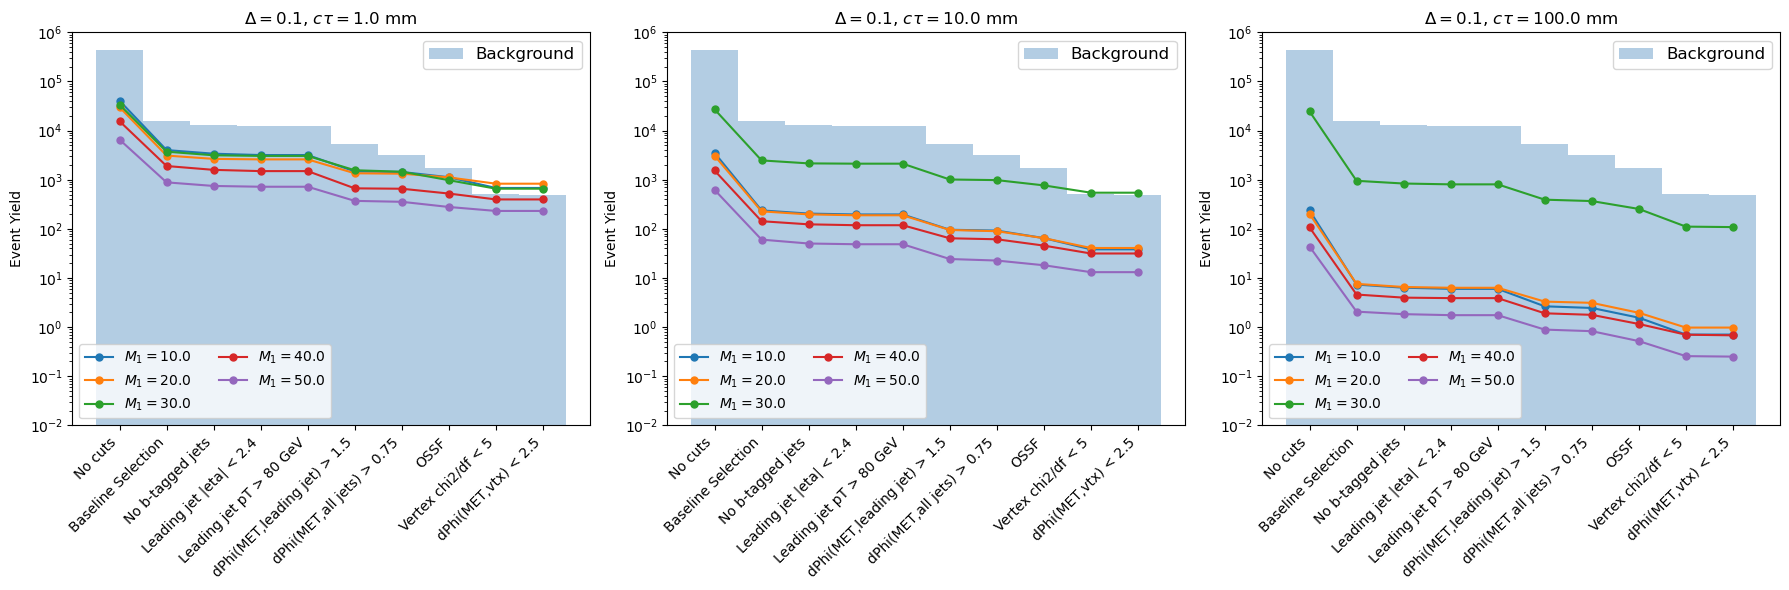

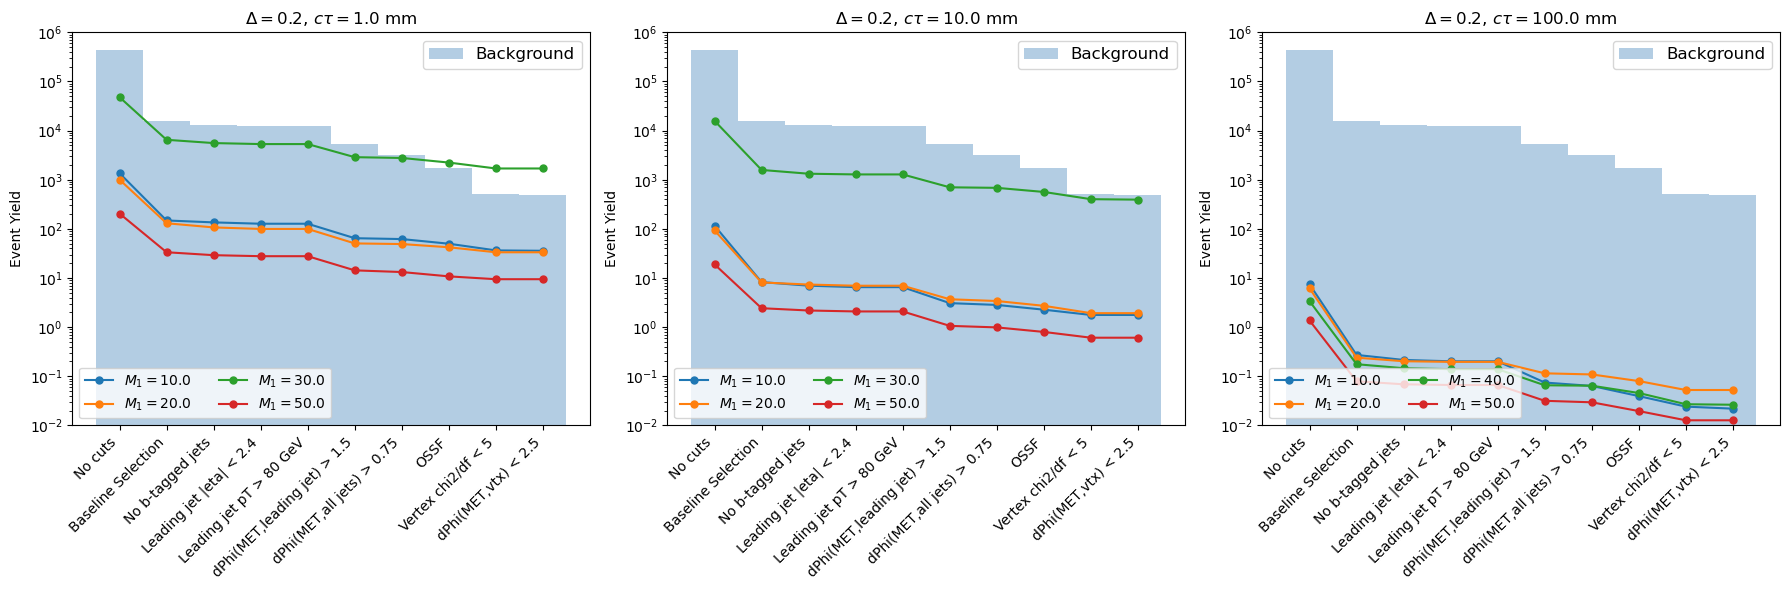

In [26]:
backgrounds = list(tot_bkg_cts.keys())

for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        plt.sca(axes[i])
        bkg_labels = []
        bkg_heights = []
        bottoms = np.array([0.0 for c in cuts])
        cmap = plt.get_cmap('Pastel1')
        bars = []
        for b in backgrounds:
            heights = [tot_bkg_cts[b][c] for c in cuts]
            x = np.arange(len(cuts))
            bars.append(plt.bar(x,heights,width=1,align='center',bottom=bottoms,color=cmap(1)))
            bottoms += np.array(heights)
        leg1 = plt.legend(bars,["Background"],loc='upper right',fontsize=12,ncol=2)
        ax = plt.gca().add_artist(leg1)
        
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        lines = []
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs = [sig['cutflow_cts'][pt][cut] for cut in cuts]
            l, = plt.plot(np.arange(len(cuts)),effs,label=r"$M_1 = {0}$".format(m1),marker='.',markersize=10)
            lines.append(l)
        plt.legend(handles=lines,loc='lower left',ncol=2)
        plt.ylim([1e-2,1e6])
        #plt.xlim([3,11])
        plt.yscale('log')
        plt.ylabel("Event Yield")
        #plt.xlabel("Cut Number")
        plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
        #plt.grid()
    plt.tight_layout()
    #plt.savefig(f"plots/cutflows/signal_vs_itemizedBkg_counts_delta{delta:.1f}.pdf")
    #plt.close()

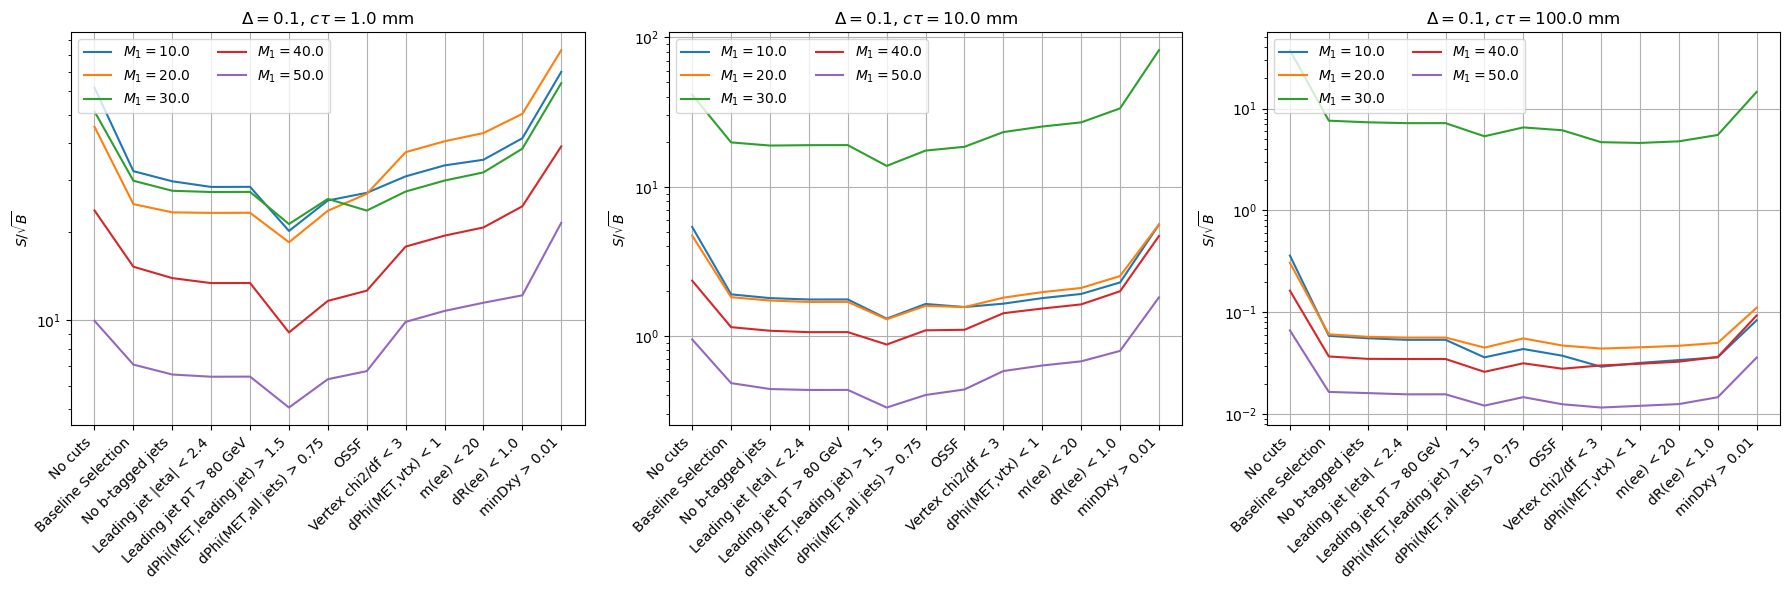

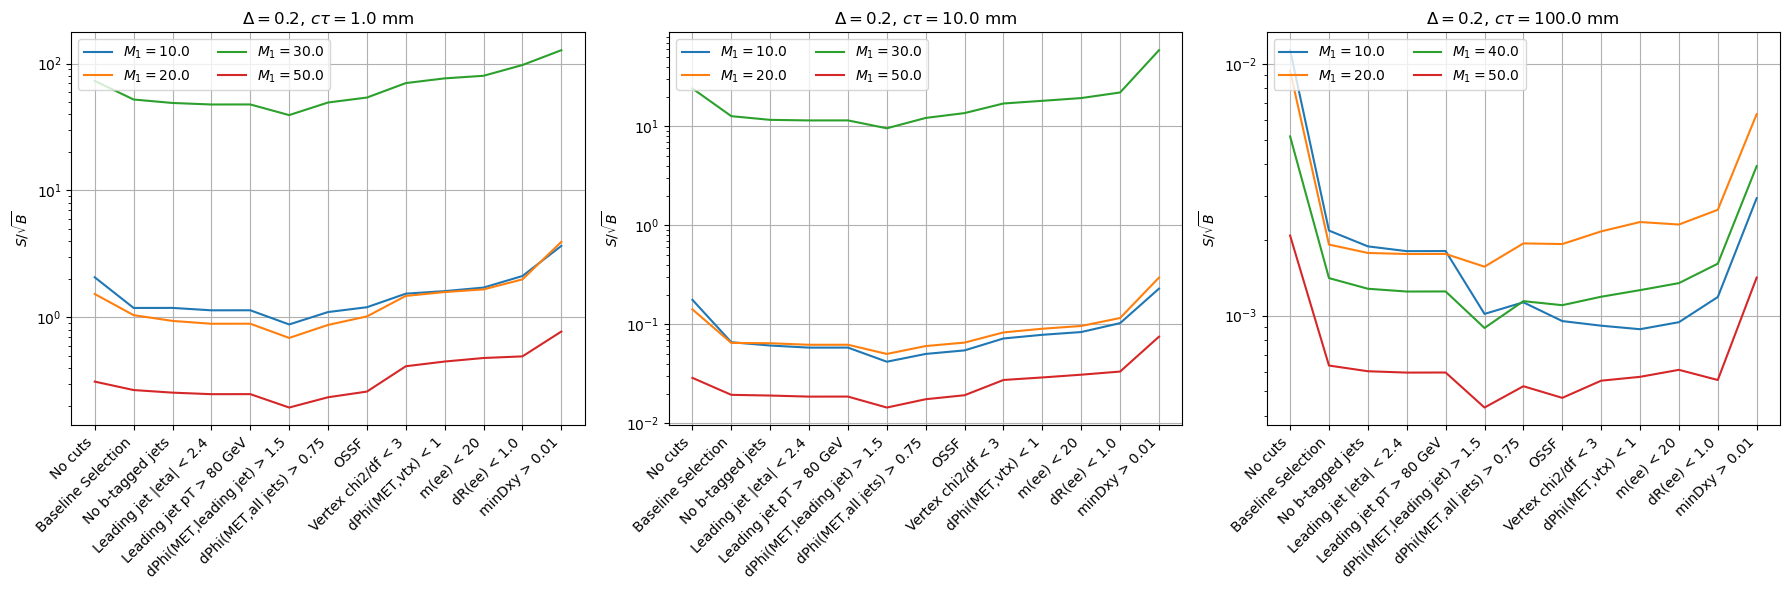

In [22]:
# S/sqrt(B)
cf_s = sig['cutflow']
ct_s = sig['cutflow_cts']
desc = sig['cutDesc']
for delta in deltas:
    all_m1s = sorted(list(set(si[si.delta==delta].m1)))
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    for i,ct in enumerate(ctaus):
        plt.sca(axes[i])
        plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))
        m1s = sorted(list(set(si[(si.delta==delta)&(si.ctau==ct)].m1)))
        for m1 in m1s:
            pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
            effs = [ct_s[pt][cut]/np.sqrt(bkg_summed_cts[cut]) for cut in cuts]
            plt.plot(np.arange(len(cuts)),effs,label=r"$M_1 = {0}$".format(m1))
        plt.legend(loc='upper left',ncol=2)
        #plt.ylim([1e-5,1e2])
        #plt.xlim([3,11])
        plt.yscale('log')
        plt.ylabel(r"$S/\sqrt{B}$")
        #plt.xlabel("Cut Number")
        plt.xticks(ticks=np.arange(len(cuts)),labels=[cutNames[c] for c in cuts],rotation=45,ha='right')
        plt.grid()
    plt.tight_layout()
    #plt.savefig(f"plots/cutflows/signal_signif_delta{delta:.1f}.pdf")
    #plt.close()